# Project 2 - Classification

<h5 style="font-size: 1.3em;color: #69956e;"> Predict customers likely to respond to a marketing campaign</h5>
<p>This notebook uses the <em>campaign.xlsx</em> dataset.</p>

<strong>Machine Learning for Marketing 2023/2024</strong>

<strong>Professors:</strong>
- Nuno António
- Ana Edmundo
- Hugo Silva
- Vasco Jesus

<strong>Projet developed by:</strong>
- Anabela Florência, r20201584
- António Cadaixa, r20201505
- Constança Rodrigues, r20201586
- Joana Pimenta, r20201590
- Laura Freitas, 20230172
<br>

<h5 style="font-size: 1.3em;color: #69956e;"> Dataset Description</h5>

- `AcceptedCmp1` : 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- `AcceptedCmp2` : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- `AcceptedCmp3` : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- `AcceptedCmp4` : 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- `AcceptedCmp5` : 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- `Response (target variable)` : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- `Complain` : 1 if customer complained in the last 2 years
- `DtCustomer` : date of customer’s enrollment with the company
- `Education` : customer’s level of education
- `Marital` : customer’s marital status
- `Kidhome` : number of small children in customer’s household
- `Teenhome` : number of teenagers in customer’s household
- `Income` : customer’s yearly household income
- `MntFishProducts` : amount spent on fish products in the last 2 years
- `MntMeatProducts` : amount spent on meat products in the last 2 years
- `MntFruits` : amount spent on fruits products in the last 2 years
- `MntSweetProducts` : amount spent on sweet products in the last 2 years
- `MntWines` : amount spent on wine products in the last 2 years
- `MntGoldProds` : amount spent on gold products in the last 2 years
- `NumDealsPurchases` : number of purchases made with discount
- `NumCatalogPurchases` : number of purchases made using catalogue
- `NumStorePurchases` : number of purchases made directly in stores
- `NumWebPurchases` : number of purchases made through company’s web site
- `NumWebVisitsMonth` : number of visits to company’s web site in the last month
- `Recency` : number of days since the last purchase
<br>

<h5 style="font-size: 1.3em; color: #69956e;">Work Description</h5>

<p style="color: #000000;"> This document aims to further explore the needs of the Marketing Department of a retail company for predicting which customers are likely to respond to a marketing campaing based on information from a previous campaign. A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

# Initializations and Data Loading

In [1]:
# Load packages
import os
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pointbiserialr
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.preprocessing import SplineTransformer
from sklearn.impute import KNNImputer
from feature_engine.creation import CyclicalFeatures
from yellowbrick.model_selection import RFECV, LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
 # Ensure this line is not indented beyond the expected level
get_ipython().system('pip install category_encoders')
import category_encoders as ce
import pickle
# import graphviz
!pip install graphviz
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

# To plot in notebook
%matplotlib inline

In [2]:
# Load the dataset 
ds = pd.read_excel('campaign.xlsx') 

# Data Understanding

In [3]:
# Display the top 10 rows - provides an overview of the variables and facilitates data understanding
ds.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58     635.0  ...                  7             0   
1  2014-03-08       38      11.0  ...                  5             0   
2  2013-08-21       26     426.0  ...                  4             0   
3  2014-02-10       26      11.0  ...                  6             0   
4  2014-01-19       94     173.0  ...                  5             0   
5  2013-09-09       16     520.0  ...                  6             0   
6  2012-11-13       34     235.0  ...                  6             0   
7  2013-05-08       32      76.0  ...                  8             0   
8  2013-06-06       19      14.0  ...                  9             0   
9  2014-03-13       68      28.0  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [4]:
# More detailed information about the DataFrame and the variables
# Helps to understand the existing types of data and the amount of non-null entries of each variable

def basic_info(ds):
    print("This dataset has ", ds.shape[1], " columns and ", ds.shape[0], " rows.")
    print("This dataset has ", ds[ds.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(ds.info())
basic_info(ds)

This dataset has  29  columns and  2240  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts

### Conclusion
- The dataset has 29 columns and 2240 observations
- The variables `Income`, `MntWines`, `MntFruits`, `MntGoldProds`, present some null values. 
- There is a predominance of numerical variables (int64, float64) but there is also some object variables, which we will transform to another dtype later.

In [5]:
# Check on missing values 
# Count of missing values per column
count_missingvalues = pd.DataFrame(ds.isnull().sum(), columns=['Total Null Data']).reset_index()
count_missingvalues[count_missingvalues['Total Null Data'] != 0]

index  Total Null Data
4         Income               24
9       MntWines                3
10     MntFruits                2
14  MntGoldProds               53

In [6]:
# Percentage of each column's data missing
percent_missing = ds.isnull().mean() * 100  
missing_value_df = pd.DataFrame(percent_missing, columns=['% of Missing Data']).reset_index()
missing_value_df[missing_value_df['% of Missing Data'] != 0]  

# Conclusion: in 'Income' and 'MntGoldProds the number of missing values is way higher that in the other two. 

index  % of Missing Data
4         Income           1.071429
9       MntWines           0.133929
10     MntFruits           0.089286
14  MntGoldProds           2.366071

## Summary Statistics Analysis

In [7]:
# Summary statistics for all variables to better understand them and check if there's any inconsistencies 
ds.describe(include='all').T

count unique         top  freq          mean  \
ID                   2240.0    NaN         NaN   NaN   5592.159821   
Year_Birth           2240.0    NaN         NaN   NaN   1968.805804   
Education              2240      5  Graduation  1127           NaN   
Marital_Status         2240      8     Married   864           NaN   
Income               2216.0    NaN         NaN   NaN  52247.251354   
Kidhome              2240.0    NaN         NaN   NaN      0.444196   
Teenhome             2240.0    NaN         NaN   NaN       0.50625   
Dt_Customer            2240    665  2012-08-31    12           NaN   
Recency              2240.0    NaN         NaN   NaN     49.109375   
MntWines             2237.0    NaN         NaN   NaN    303.838623   
MntFruits            2238.0    NaN         NaN   NaN     26.252011   
MntMeatProducts      2240.0    NaN         NaN   NaN        166.95   
MntFishProducts      2240.0    NaN         NaN   NaN     37.523661   
MntSweetProducts     2240.0    NaN         NaN   NaN  11634.152232   
MntGoldProds         2187.0    NaN         NaN   NaN     44.596251   
NumDealsPurchases    2240.0    NaN         NaN   NaN         2.325   
NumWebPurchases      2240.0    NaN         NaN   NaN      4.084821   
NumCatalogPurchases  2240.0    NaN         NaN   NaN      2.662054   
NumStorePurchases    2240.0    NaN         NaN   NaN      5.790179   
NumWebVisitsMonth    2240.0    NaN         NaN   NaN      5.316518   
AcceptedCmp3         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp4         2240.0    NaN         NaN   NaN      0.074554   
AcceptedCmp5         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp1         2240.0    NaN         NaN   NaN      0.064286   
AcceptedCmp2         2240.0    NaN         NaN   NaN      0.013393   
Complain             2240.0    NaN         NaN   NaN      0.009375   
Z_CostContact        2240.0    NaN         NaN   NaN           3.0   
Z_Revenue            2240.0    NaN         NaN   NaN          11.0   
Response             2240.0    NaN         NaN   NaN      0.149107   

                               std     min      25%      50%      75%  \
ID                     3246.662198     0.0  2828.25   5458.5  8427.75   
Year_Birth               11.984069  1893.0   1959.0   1970.0   1977.0   
Education                      NaN     NaN      NaN      NaN      NaN   
Marital_Status                 NaN     NaN      NaN      NaN      NaN   
Income                25173.076661  1730.0  35303.0  51381.5  68522.0   
Kidhome                   0.538398     0.0      0.0      0.0      1.0   
Teenhome                  0.544538     0.0      0.0      0.0      1.0   
Dt_Customer                    NaN     NaN      NaN      NaN      NaN   
Recency                  28.962453     0.0     24.0     49.0     74.0   
MntWines                336.576209     0.0     24.0    173.0    504.0   
MntFruits                39.699755     0.0      1.0      8.0     33.0   
MntMeatProducts         225.715373     0.0     16.0     67.0    232.0   
MntFishProducts          54.630198    -1.0      3.0     12.0     50.0   
MntSweetProducts     497378.604745     0.0      1.0      8.0    33.25   
MntGoldProds             52.419487     0.0      9.0     25.0     57.0   
NumDealsPurchases         1.932238     0.0      1.0      2.0      3.0   
NumWebPurchases           2.778714     0.0      2.0      4.0      6.0   
NumCatalogPurchases       2.923101     0.0      0.0      2.0      4.0   
NumStorePurchases         3.250958     0.0      3.0      5.0      8.0   
NumWebVisitsMonth         2.426645     0.0      3.0      6.0      7.0   
AcceptedCmp3              0.259813     0.0      0.0      0.0      0.0   
AcceptedCmp4              0.262728     0.0      0.0      0.0      0.0   
AcceptedCmp5              0.259813     0.0      0.0      0.0      0.0   
AcceptedCmp1              0.245316     0.0      0.0      0.0      0.0   
AcceptedCmp2              0.114976     0.0      0.0      0.0      0.0   
Complain               

#### Variable Analysis
- `ID`: Unique identifier for each record. The dataset contains 2240 distinct entries. Its statistical measures are not informative for the dataset's analysis.
  
- `Year_Birth`: Birth year of individuals, ranging from 1893 to 1996 with an average year of 1969. Since the value of the 1st quartile is 1959, we will have to check if the minimum value is an outlier, since the years are really far away from each other.
- `Education`: The education level is provided as categorical data, and that explains why we don't have all the summary statistics for this variable. The most common educational level is 'Graduation' with 1127 occurrences among 5 unique categories.
- `Marital Status`: This is also a categorical variable, with 'Married' being the most frequent value, appearing 864 times. There are 8 unique marital statuses listed.
- `Income`: Continuous variable with a significant range from 1730 to 666666. The average income is around 52247 with a standard deviation of 25173. Given that the standard deviation is almost half the value of the mean, this indicates a significant spread of data points around the averam . It has missing values, as stated before.
- `Kidhome`: Indicates the number of kids living in the customers' household, ranging from 0 to 2. Most records have no kids or one kid at home.
- `Teenhome`: Similar to `Kidhome` but for teenagers; also ranges from 0 to 2.
- `Dt_Customer`: Date when the customer joined the company. Spans 665 unique dates with the most frequent being 31st August, 2012 (12 occurrences).
- `Recency`: Days since last purchase, ranging from 0 to 99 days. The average is 49.1, which suggests that, on average, customers wait about 7 weeks to make a new purchase. The standard deviation is 28.96 days, indicating a moderate spread around the average. The minimum value is 0, which can indicate customers who made more than one purchase on the same day.
- `MntWines`: Amount spent on wine in the last 2 years. Varies widely from 0 to 1493. The average amount spent is 303.84. The max value is quite high compared to the 75th percentile and the standard deviation values are a bit high as well, which may indicate an outlier.
- `MntFruits`: Amount spent on fruits, which is generally lower (from 0 to 199) compared to wine. The average amount spent is 26,25 and the max value is quite high compared to the 75th percentile, as before.
- `MntMeatProducts`: Amount spent on meat products, showing considerable spending with a maximum of 1725. The average amount spent on meat products is 166,95 with a standard deviation of 225.72. Perhaps, we are in the presence of an outlier, again.
- `MntFishProducts`: Amount spent on fish products, ranging from -1 to 259. The average amount spent 37,52. The minimum value is -1 (which might be an error in data collection or a refund) and the maximum value is 259, which suggest an outlier.
- `MntSweetProducts`: Amount spent on sweet products, ranging extensively from 0 to 23423444, with an extremely high mean, suggesting outliers or errors in data entry.
- `MntGoldProds`: Amount spent on gold-related products, varying from 0 to 362, indicating some level of interest in these products among customers. This variable has a lot of missing values.
- `NumDealsPurchases`: Number of purchases made on deals; relatively low (0 to 15), suggesting moderate usage of promotional offers.
- `NumWebPurchases`: Number of purchases made through the website, showing a range of 0 to 27. Customers are moderately active in online shopping.
- `NumCatalogPurchases`: Number of purchases made through catalogs. The range is from 0 to 28, indicating varied customer preferences for catalog shopping.
- `NumStorePurchases`: Indicates in-store purchases ranging from 0 to 13. This is the most preferred purchasing method among the sampled customers, with an average of 5.79 purchases.
- `NumWebVisitsMonth`: Shows how many times customers visited the website in a month, ranging from 0 to 20, highlighting varying degrees of web engagement.
- `AcceptedCmp(*)`: These represent acceptance rates for five different marketing campaigns. The acceptance rates are low, all under 10%, indicating either selective acceptance or ineffective campaigns.
- `Complain`: Very few complaints recorded (maximum of 1), suggesting generally satisfactory customer experiences.
- `Z_CostContact`, `Z_Revenue`: These columns seem to have constant values (3 for Z_CostContact and 11 for Z_Revenue) across all records, possibly meaning internally used standardized metrics not varying per customer.
- `Response`: Represent whether a customer responded positively to a marketing campaign. About 14.91% of customers responded positively. This variable likely serves as the target for predictive modeling efforts aimed at understanding or predicting customer response to marketing activities. 

In [8]:
# Unique values in the 'Education' column
education_unique = ds['Education'].unique()
print("Unique values in Education:", education_unique)
print("")
print("Value counts for Education:")
print(ds['Education'].value_counts())

Unique values in Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Value counts for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [9]:
# Unique values in the 'Marital_Status' column
marital_status_unique = ds['Marital_Status'].unique()
print("Unique values in Marital_Status:", marital_status_unique)
print("")
print("Value counts for Marital Status:")
print(ds['Marital_Status'].value_counts())

Unique values in Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Value counts for Marital Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


#### Other Considerations
The entries labelled as 'Absurd' and 'YOLO' do not represent valid marital statuses and seem to be data entry errors. Given their very low frequency, we will either remove these records from the dataset or reclassify them into a more appropriate existing category.
The 'Alone' category, with only 3 occurrences, likely represents individuals who are single but labelled it differently. Reclassifying these entries as 'Single' would consolidate the data and make it more uniform. This will be treated later on.

## Correlation Analysis

### Correlation Matrix Heatmap Analysis

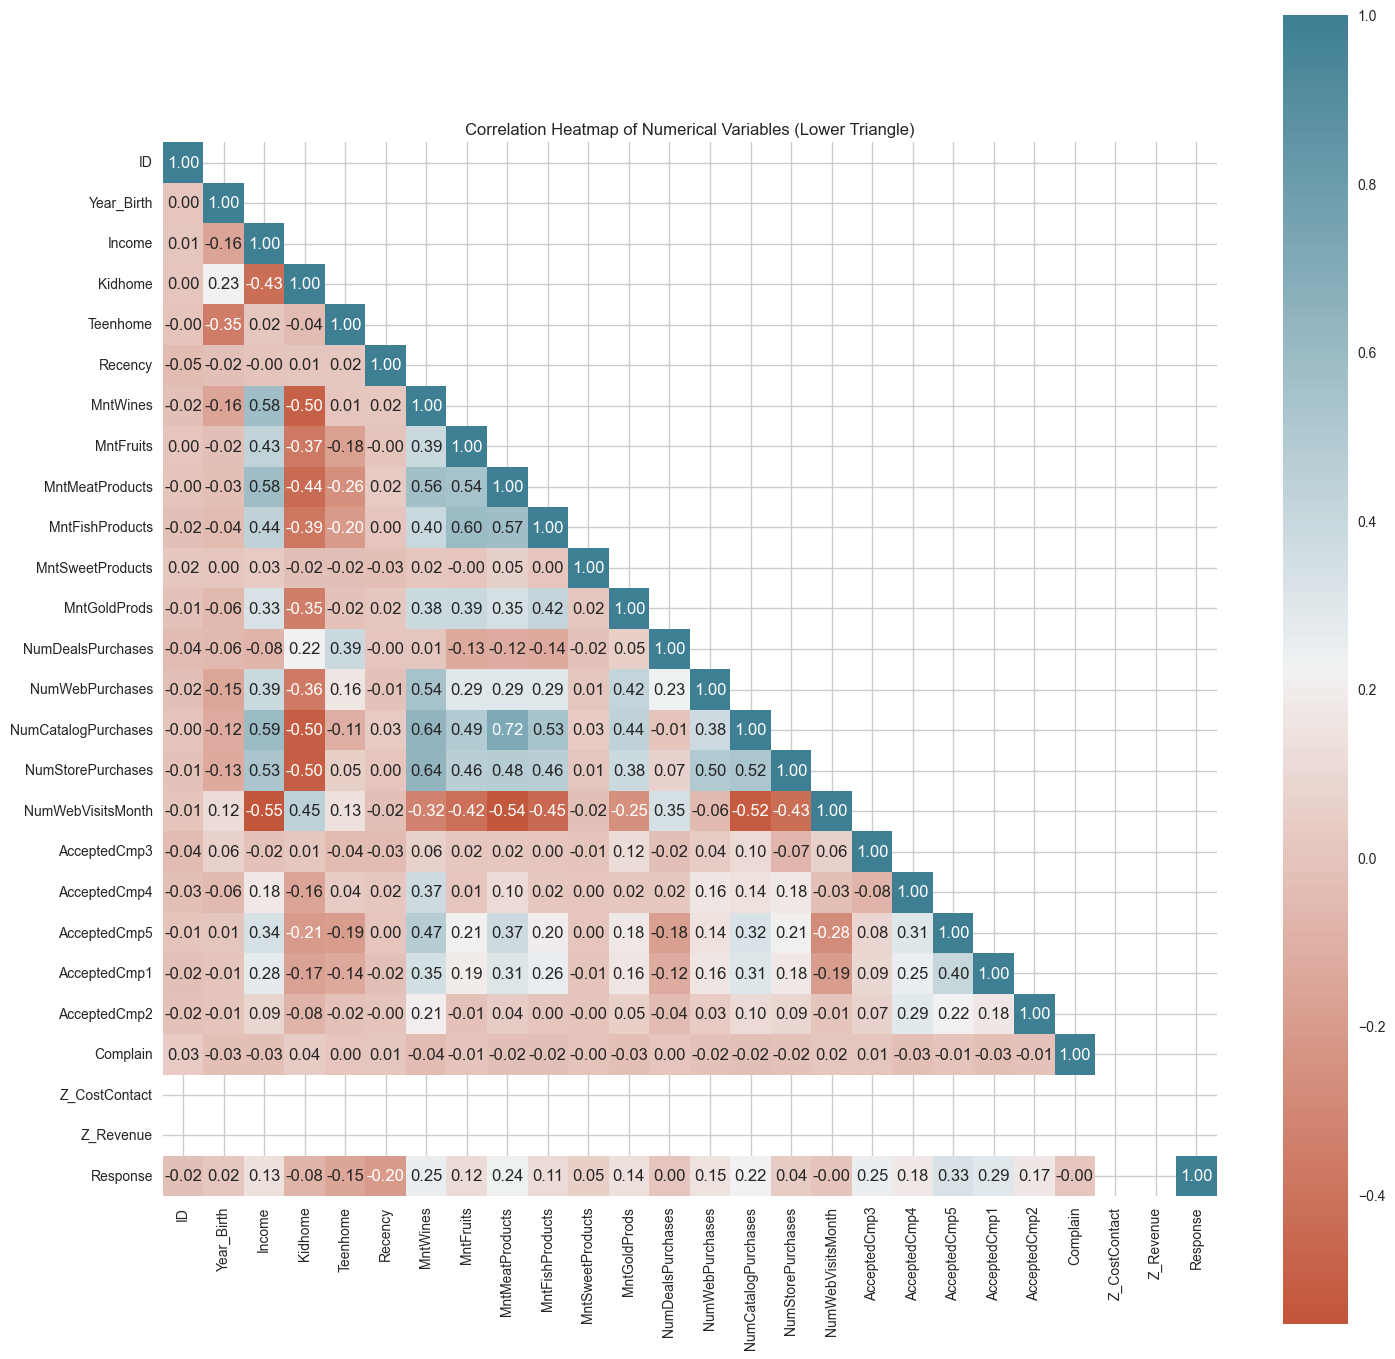

In [10]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns
numerical_ds = ds.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_ds.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

#### Conclusion

1. **Strong Positive Correlations**:
   - There is a notable positive correlation between the amounts spent on different product categories such as `MntMeatProducts`, `MntFishProducts`, `MntWines` and `MntFruits` (0.54 to 0.60). This suggests that customers who spend more on one type of product tend to spend more across other types as well, indicating a general purchasing power or preference for buying more from all categories.
   - `NumCatalogPurchases` shows strong positive correlations with `MntWines` (0.64), `MntMeatProducts` (0.72). This may reflect that customers who buy through catalogs tend to purchase higher quantities of these specific products. It is also higher correlated with the `Income`.
   - `NumStorePurchases` also has strong correlations with `MntWines` (0.64), suggesting that store shoppers tend to buy significant amounts of wines. 
<p>
</p>

2. **Relationship with 'Response' Variable**:
   - The `Response` variable, which could be indicating whether a customer responded positively to the last campaign, has some moderate positive correlations with `MntWines` (0.25), `MntMeatProducts` (0.24), `AcceptedCmp1`, `AcceptedCmp1` and `AcceptedCmp5`, with values ranging from 0.25 to 0.33. This might indicate that customers who spend more in these categories are also more receptive to campaigns, possibly due to higher engagement or a greater affinity for the products being promoted.
   - This varible has also some moderate negative correlations with `Teenhome` and `Recency` suggesting that having teenagers at home might decrease the likelihood of responding positively to campaigns, possibly due to different spending priorities. 
<p>
</p>

3. **Strong Negative Correlations**:
    - Interestingly, there’s a negative correlation between `Kidhome` and most of the spending variables like `MntWines` (-0.50), `MntMeatProducts` (-0.44), and `NumStorePurchases` (-0.50). This implies that having younger children at home may reduce the ability or willingness to spend on these product categories.
    - There is also a strong negative correlation between `NumWebVisitsMonth` and `Income` of the costumer, which could mean that lower-income customers might prefer using the website due to its accessibility and convenience, possibly as a method to find deals or discounts that aren't as readily available in physical stores.
<p>
</p>

4. **Low Correlations**:
   - `ID`, `Z_CostContact` and `Z_Revenue` show no correlation with other variables, which might suggest they do not vary across customers or are not meaningful for analysis.

### Point-Biserial Correlation

In [11]:
# This type of correlation is used when one variable is binary and the other is continuous; it is a special case of the Pearson correlation. 
# Since we already have the Correlation Matrix to see the correlation between numeric variables, we thought it was worth doing for the remaining variables as well.

# Store original 'Income' column for later use
original_income = ds['Income'].copy()

# Impute missing values in 'Income' column
ds['Income'].fillna(ds['Income'].median(), inplace=True)

# Calculate point-biserial correlation
corr, p_value = pointbiserialr(ds['Response'], ds['Income'])
print(f"Point-biserial correlation coefficient between Response and Income: {corr}")
print(f"P-value: {p_value}")

# Revert 'Income' column back to its original state
ds['Income'] = original_income

Point-biserial correlation coefficient between Response and Income: 0.13286740696810947
P-value: 2.737996512826007e-10


#### Conclusion
- The value of 0.132 indicates a positive but weak correlation between the income of individuals and their response to marketing campaigns. This suggests that as income increases, there is a slight tendency for responses to be more positive, but the strength of this tendency is weak.
- The p-value of 2.737^ − 10 is very small, which suggests that the correlation observed is statistically significant. While `Income` does play a role, it should not be considered a strong predictor by itself for positive responses.

### Chi-Squared Test of Independence

In [12]:
# Chi-Squared Test is used for testing the independence between two categorical variables, and can be used with a binary variable (Marital Status and Response)

crosstab = pd.crosstab(index=ds['Marital_Status'], columns=ds['Response'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared Test Statistic: 54.241636705551365
P-value: 2.1067470540907e-09


In [13]:
# Analyse the relationship between Education and Response

crosstab = pd.crosstab(index=ds['Education'], columns=ds['Response'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared Test Statistic: 23.0760975769431
P-value: 0.00012226975294505314


#### Conclusion
**Marital Status vs Response**:
- The p-value is extremely low, which indicates that the relationship between `Marital_Status` and `Response` is statistically significant, rejecting the null hypothesis which states that there is no association between the variables.
- The chi-squared test statistic is quite high, suggesting that different marital statuses do indeed relate differently to the responses to marketing campaigns.
- Conclusion: `Marital_Status` is a factor that should be considered when predicting or analyzing responses to marketing efforts.

**Education vs Response**:
- As before, the p-value is very low, so, there is a statistically significant association between `Education` and `Response` to marketing campaigns.
- The significant chi-squared statistic suggests that different educational levels affect response rates to marketing initiatives.
- Conclusion: This implies that the educational background of customers influences their likelihood of responding positively to marketing campaigns.

### ANOVA

In [14]:
# ANOVA is useful for comparing the means of a numerical variable across multiple categories of a single categorical variable.
# Therefore, this may be useful to check if the average 'Income' differs significantly among different 'Education' levels or 'Marital_Status'.

# Perform ANOVA
model = ols('Income ~ C(Education)', data=ds).fit()
anova_results_education = sm.stats.anova_lm(model, typ=2)
print(anova_results_education)

model_marital = ols('Income ~ C(Marital_Status)', data=ds).fit()
anova_results_marital = sm.stats.anova_lm(model_marital, typ=2)
print(anova_results_marital)

                    sum_sq      df          F        PR(>F)
C(Education)  6.707271e+10     4.0  27.739182  1.667728e-22
Residual      1.336537e+12  2211.0        NaN           NaN
                         sum_sq      df         F    PR(>F)
C(Marital_Status)  4.038761e+09     7.0  0.910237  0.497306
Residual           1.399571e+12  2208.0       NaN       NaN


#### Conclusion
- The extremely low p-value confirms a significant effect of education level on `Income`, which is expected as `Education` typically influences earning potential. So, higher education levels might correlate with higher disposable income, potentially affecting responses to different types of marketing campaigns, especially those involving higher-priced products or services.
- The high p-value suggests that `Marital_Status` does not significantly impact income within this dataset. This could mean that this variable alone is not a strong determinant of `Income` differences among customers.

# Data Visualization

In [15]:
# Set the color palette
color1 = my_palette[199]
color2 = my_palette[150]
color3 = my_palette[100]
color4 = my_palette[50]
color5 = my_palette[1]
campaign_colors = [color1, color2, color3, color4, color5]

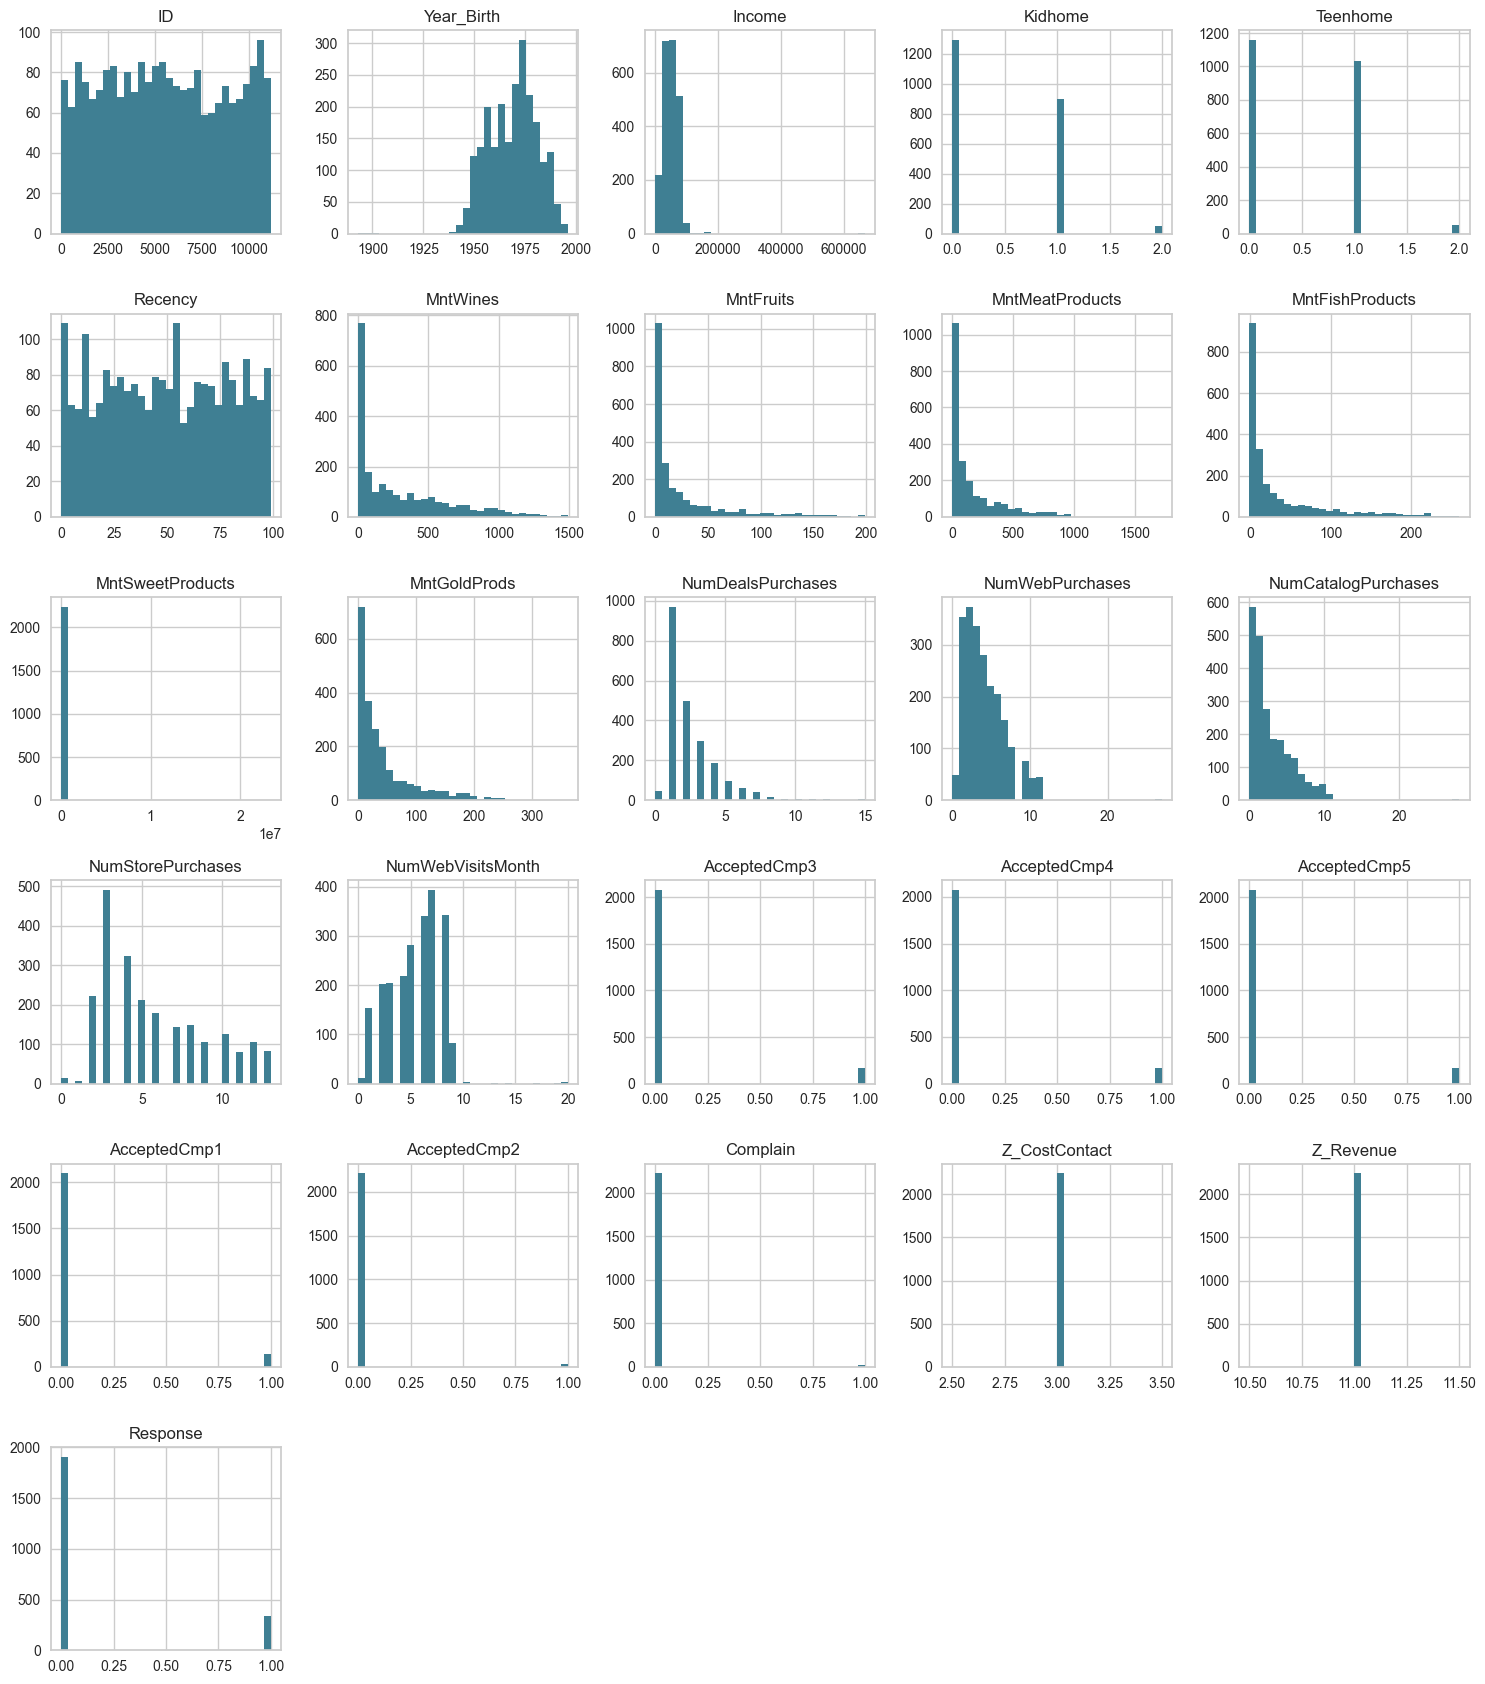

In [16]:
# Plot the distribution of each variable

ds.hist(figsize=(15, 17), bins=30, color=color1)
plt.tight_layout()
plt.show()

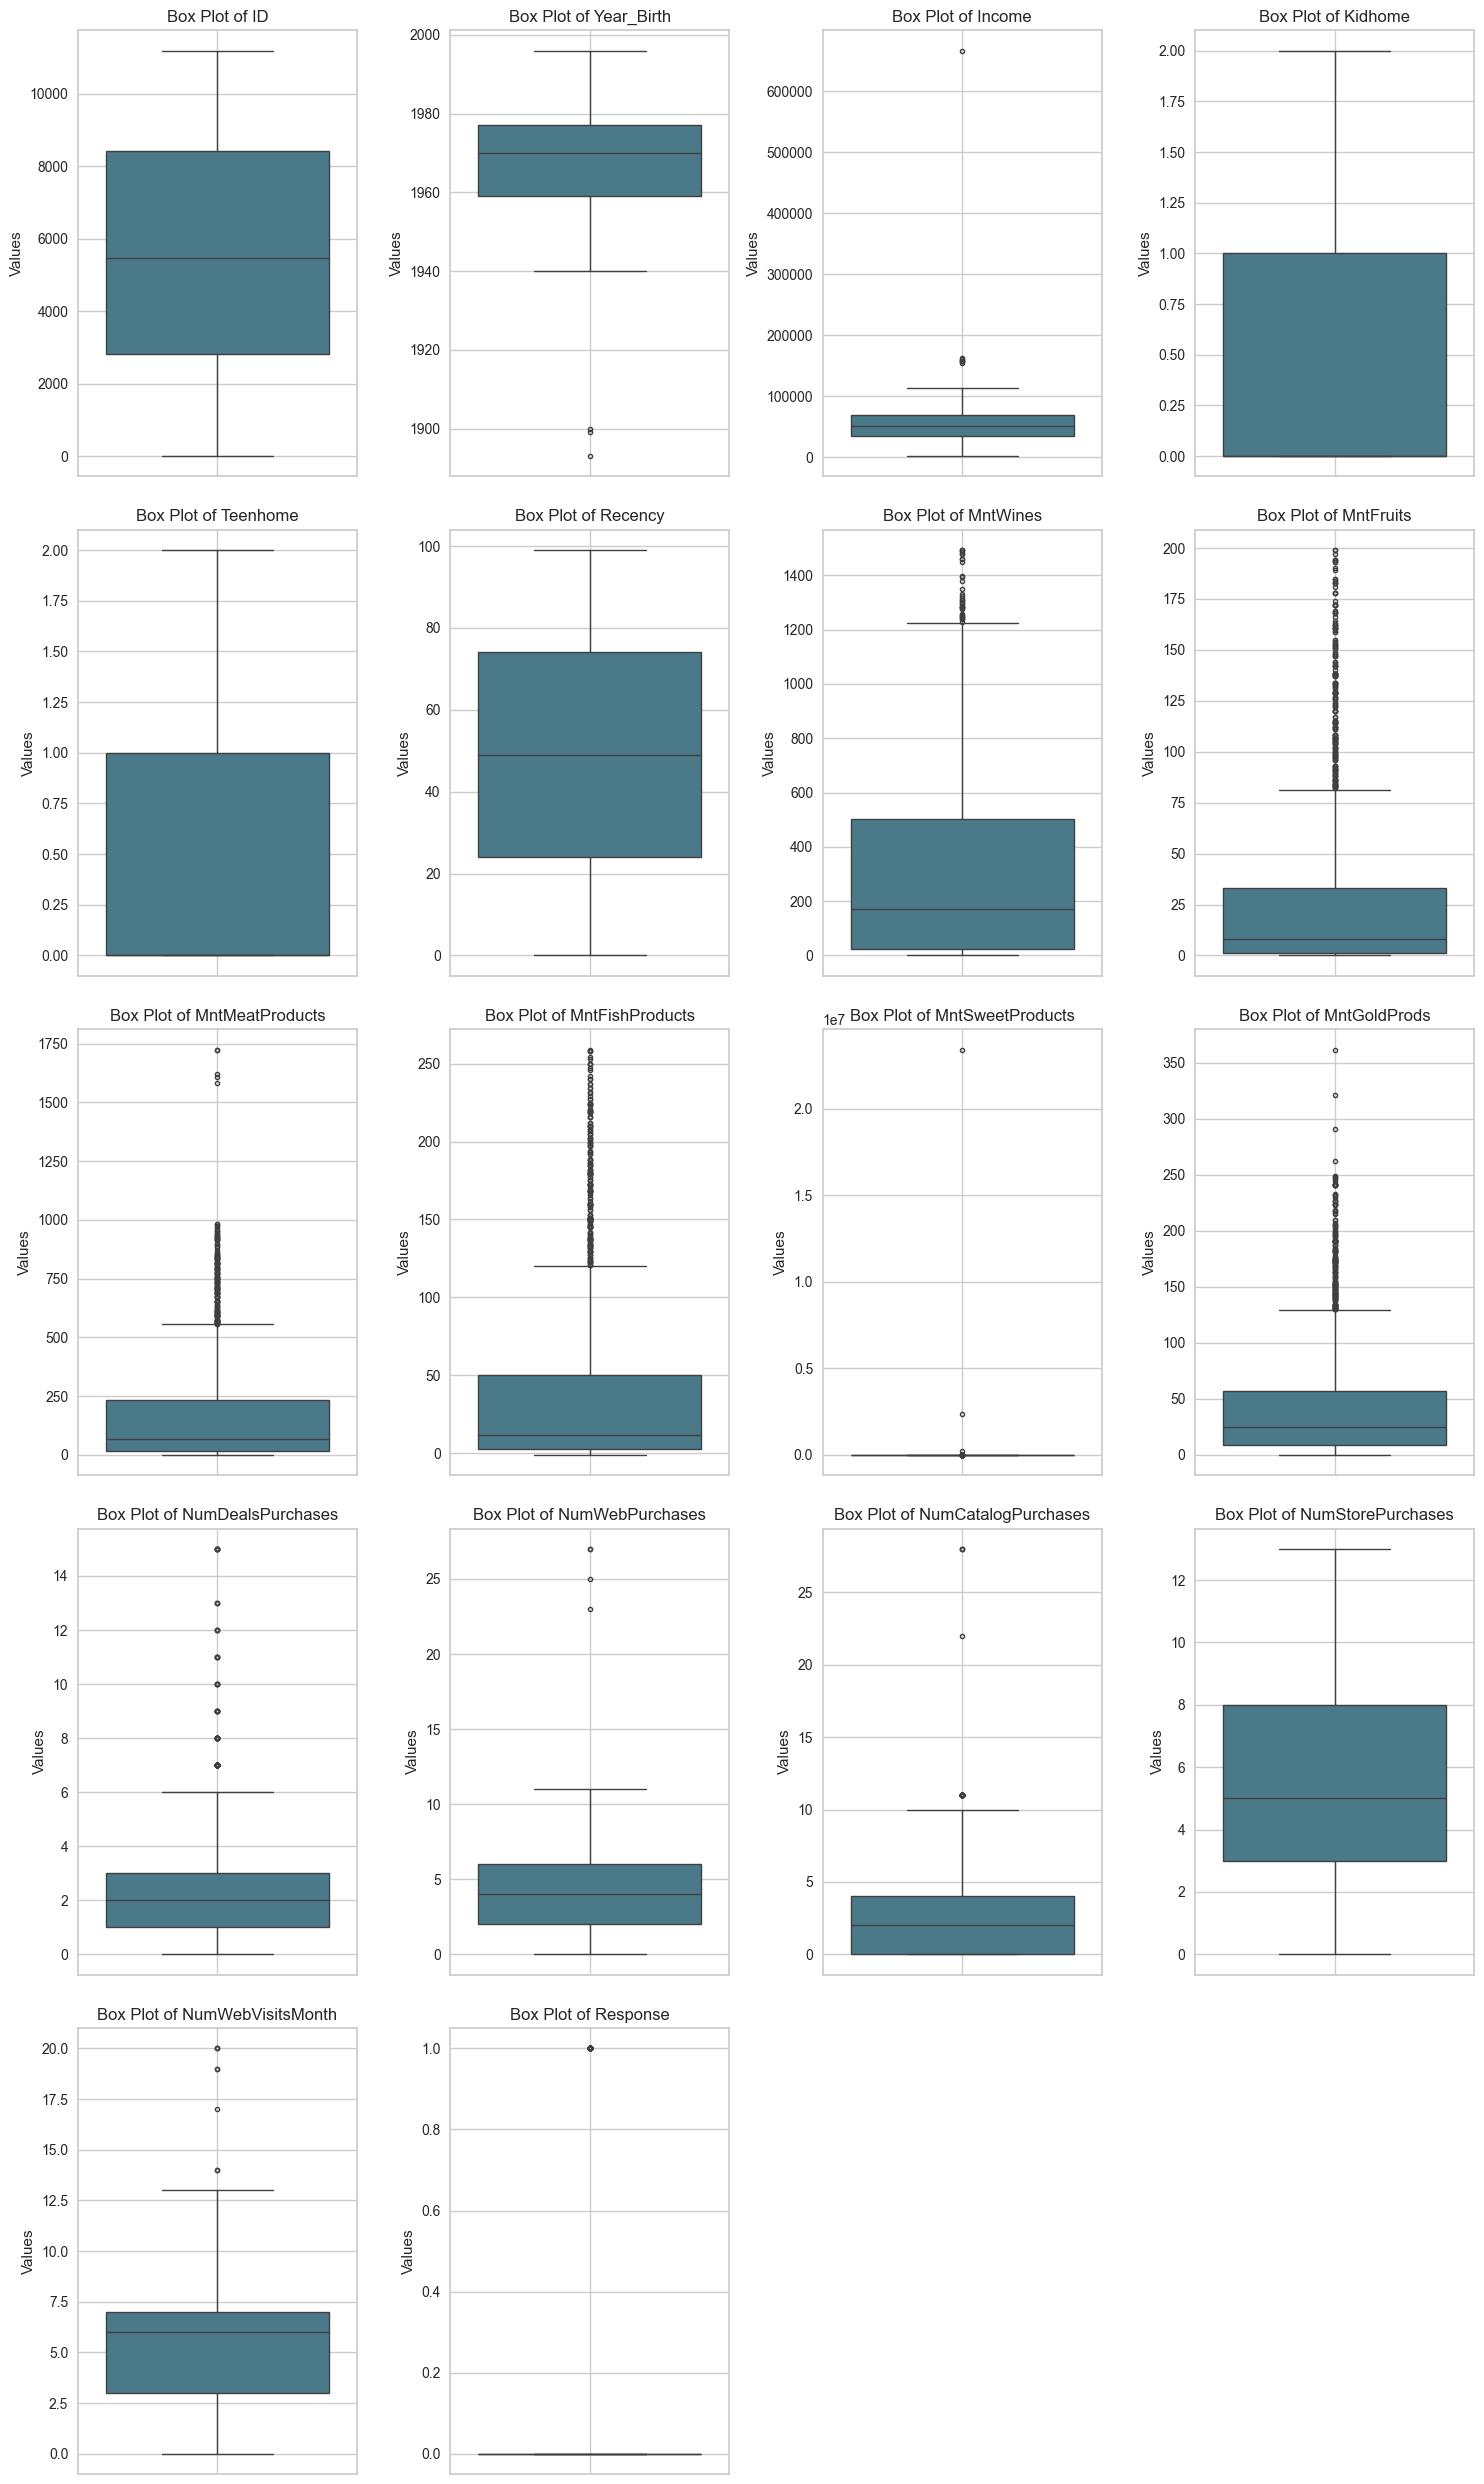

In [17]:
# Box Plot to analyze outliers

# Define excluded columns
exclude_columns = ['AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Complain']

# Selecting only numerical columns excluding the ones to exclude
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns, errors='ignore')

# Calculate the number of rows and columns needed for subplots
num_cols = 4  # Number of columns per row
num_rows = (len(numerical_columns.columns) + num_cols - 1) // num_cols  # Adjust rows based on columns

plt.figure(figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.35)

# Iterate over each numerical column and create a box plot
for i, col in enumerate(numerical_columns.columns):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=ds[col], color=color1, fliersize=3)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel('Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

### Conclusions

There are many columns with outliers, but most of them seem like natural outliers came from population.

1. On the `Year_Birth` variable,  it is possible to see that we there are 3 person that are really old. Given that we think they are not customers who will respond to a marketing campaing, we decide to eliminate them later.
2. While there are notable outliers in the `Income` variable, the nature of income distribution inherently includes significant variance. High-income outliers represent a potentially valuable customer segment for premium products or services. Therefore, keeping these outliers will allow us to tailor specific marketing strategies that cater to high-end consumers, possibly enhancing revenue from upscale market segments.
3. For spending-related variables such as `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, and `MntGoldProds`, as well as transaction-related variables like `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, and `NumWebVisitsMonth`, the outliers indicate customers with unusually high purchase volumes or frequent interactions. These outliers are particularly valuable as they highlight our most engaged and possibly most profitable customers. Eliminating these data points would remove valuable insights into consumer behavior and spending capacity. Therefore, these outliers will be retained to ensure our analysis captures all facets of customer engagement and spending behavior.

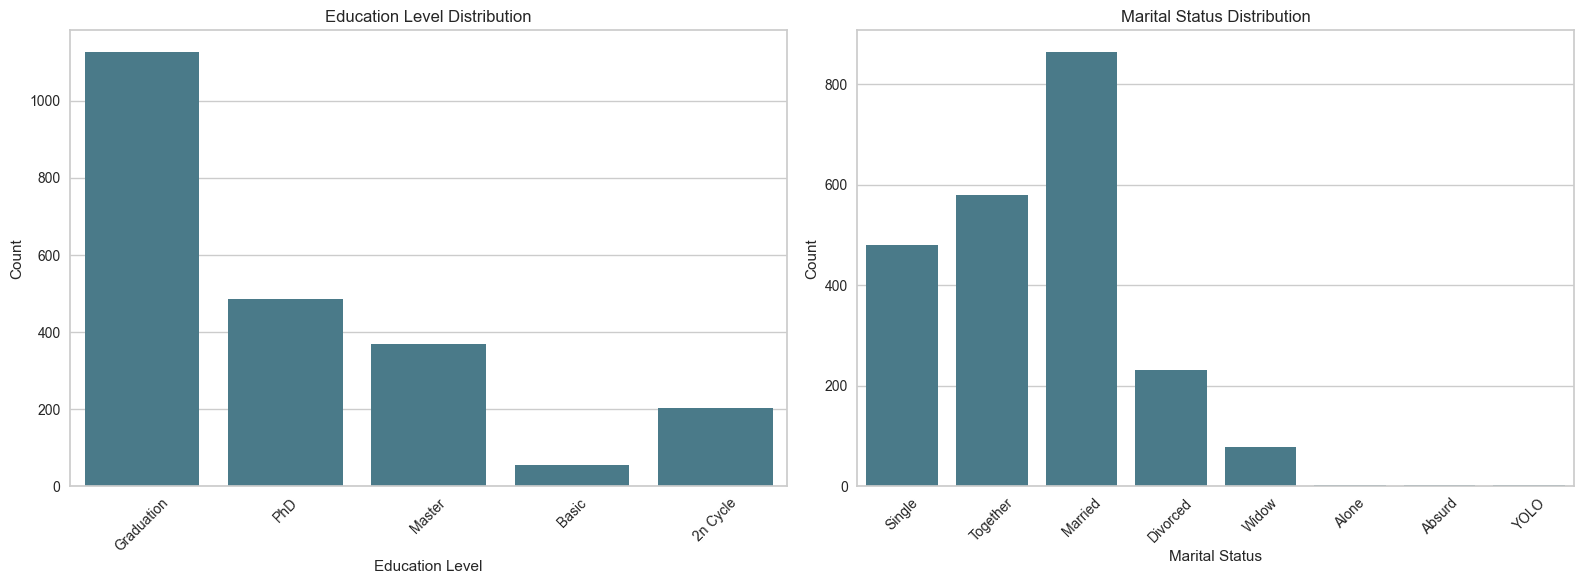

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart of Education Levels
sns.countplot(data=ds, x='Education', ax=axes[0], color=color1)
axes[0].set_title('Education Level Distribution')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar Chart of Marital Status
sns.countplot(data=ds, x='Marital_Status', ax=axes[1], color=color1)
axes[1].set_title('Marital Status Distribution')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

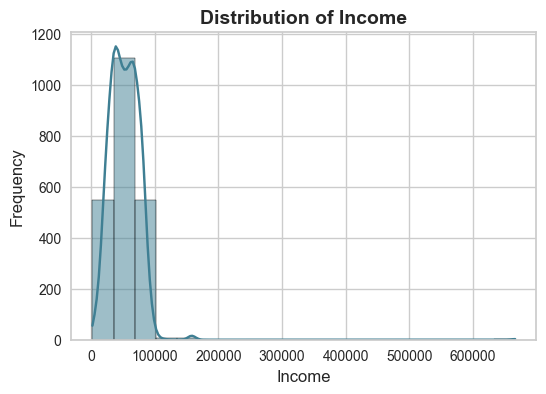

In [19]:
# Distribution of 'Income' variable

plt.figure(figsize=(6, 4))

sns.histplot(data=ds, x='Income', bins=20, kde=True, color=color1, edgecolor='black')
plt.title('Distribution of Income', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show() 

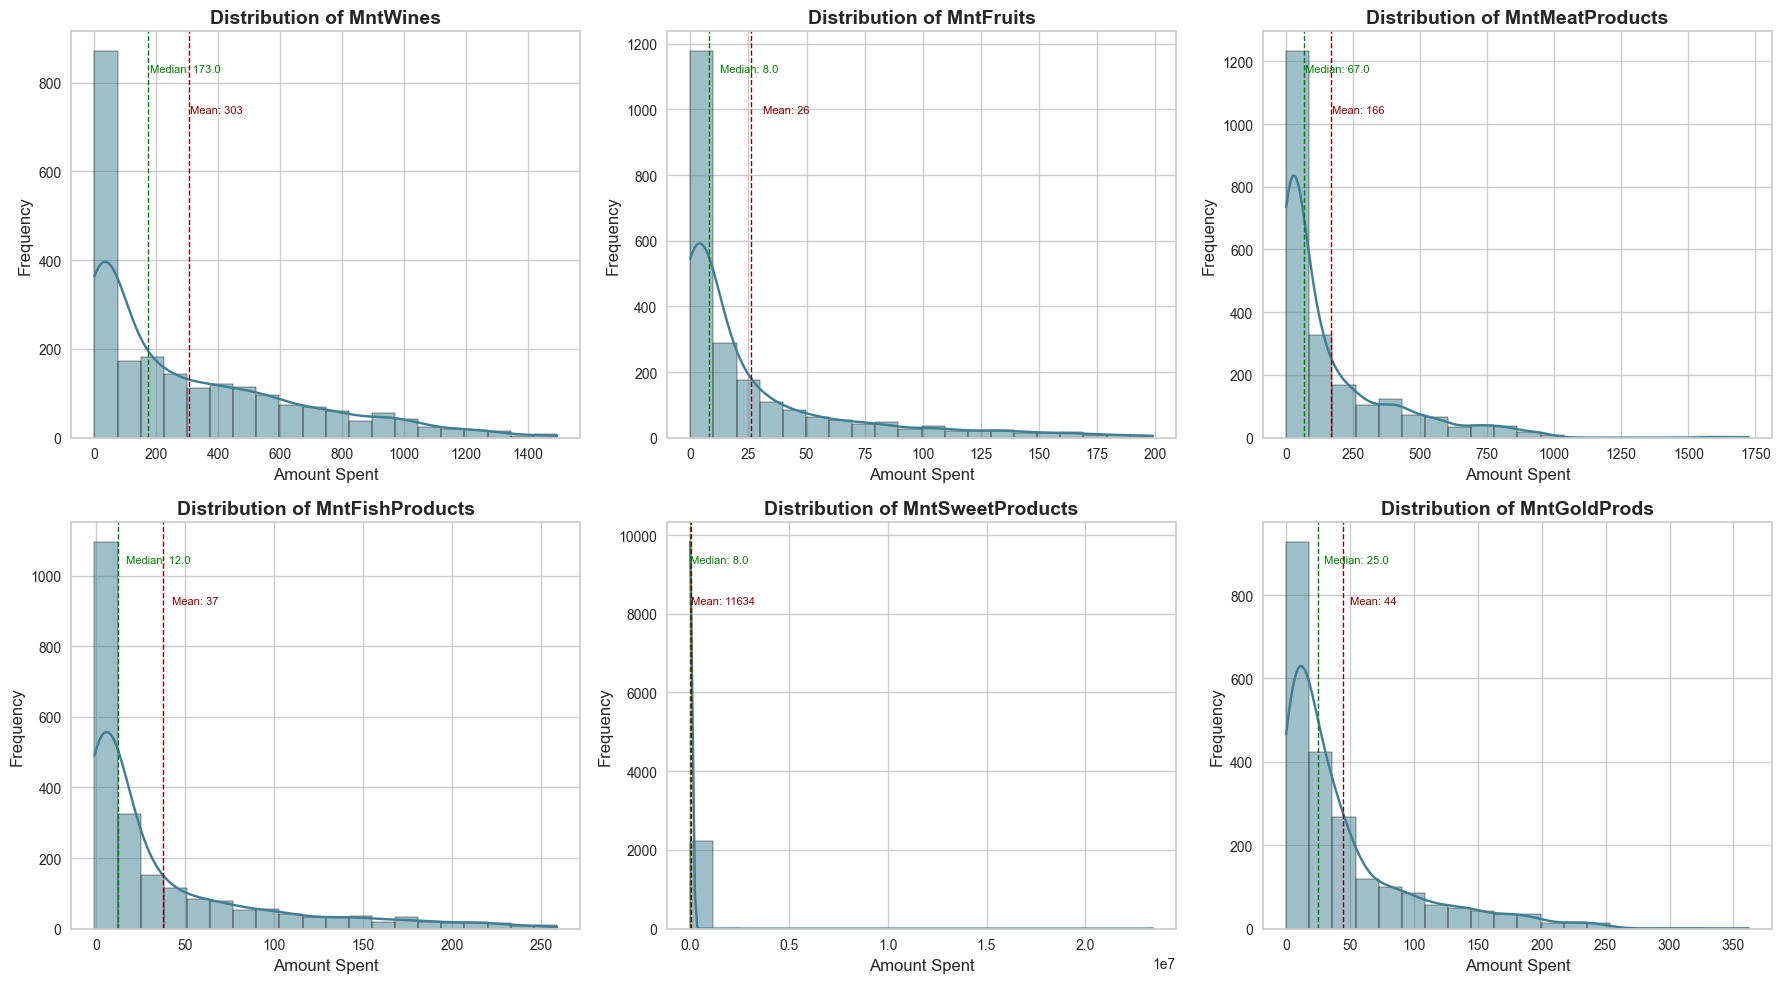

In [20]:
# Distribution of amount spent on products

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(18, 10))

for i, col in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=ds, x=col, bins=20, kde=True, color=color1, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Amount Spent', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    median_value = ds[col].median()
    mean_value = ds[col].mean()

    # Display the median as a vertical line
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
    plt.text(median_value + 5, plt.ylim()[1] * 0.9, f'Median: {median_value}', color = 'green', fontsize=8)

    # Display the mean as a vertical line
    plt.axvline(mean_value, color='darkred', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, plt.ylim()[1] * 0.8, f'Mean: {int(mean_value)}', color = 'darkred', fontsize=8)

plt.tight_layout() 
plt.show()

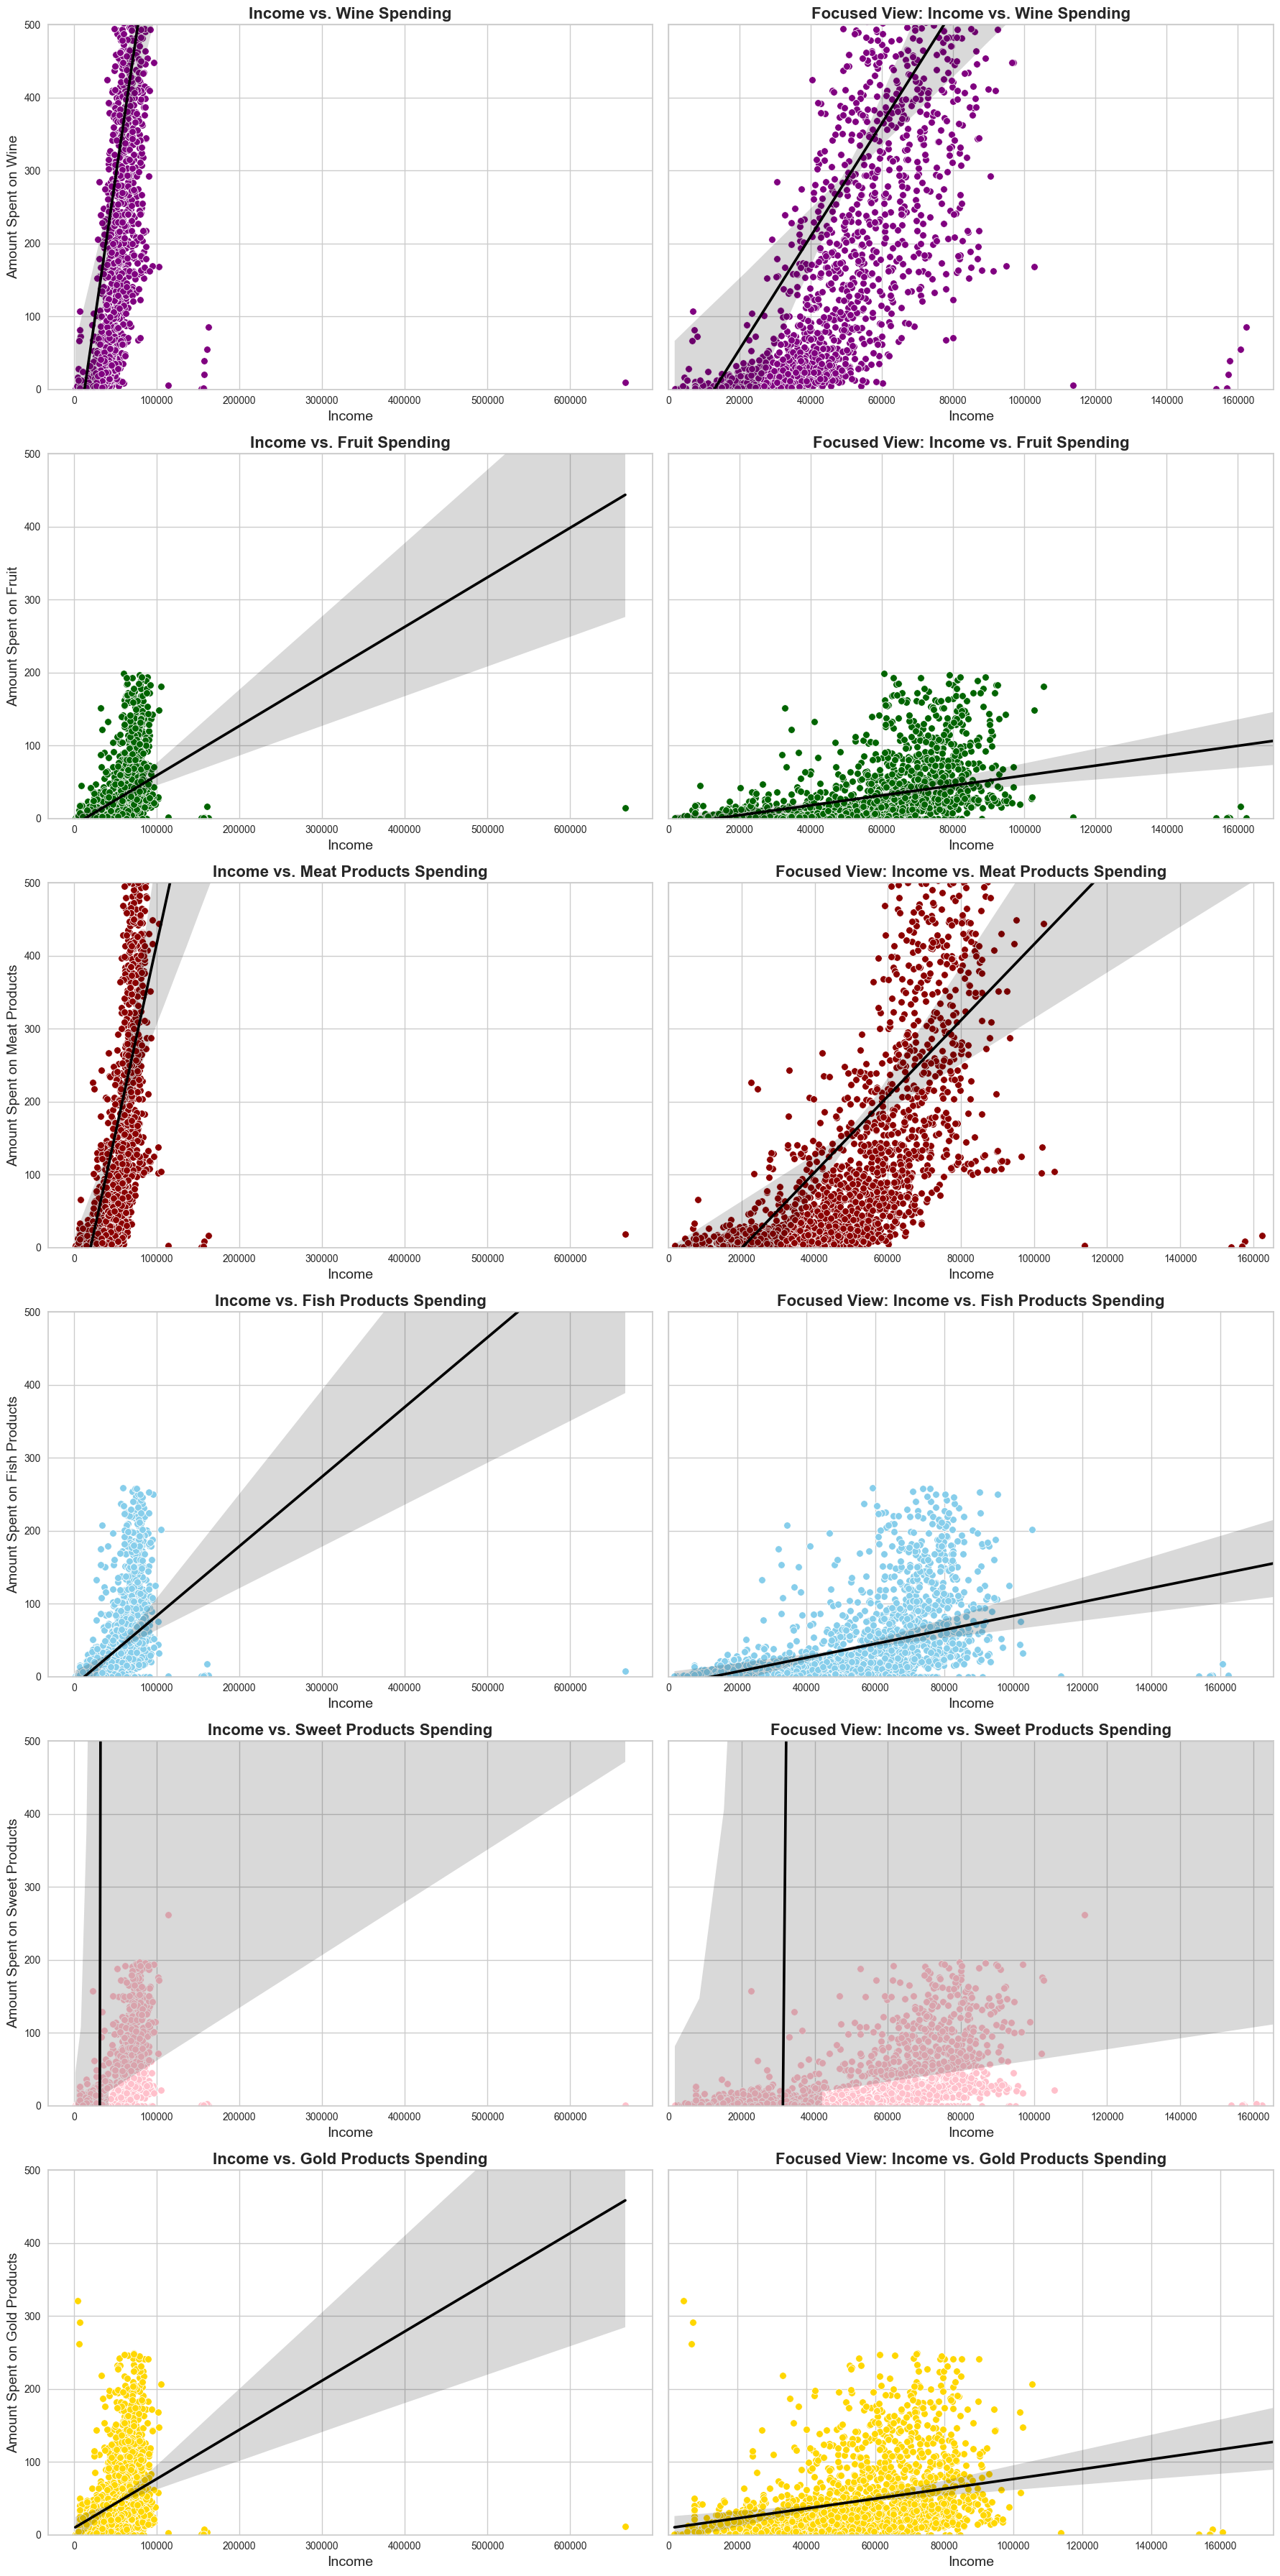

In [21]:
# Scatter Plot of Income vs. Amount Spent on X Products

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42), (ax51, ax52), (ax61, ax62)) = plt.subplots(6, 2, figsize=(18, 36), sharey=True)

# Wine Spending
sns.scatterplot(data=ds, x='Income', y='MntWines', color='purple', ax=ax11)
sns.regplot(data=ds, x='Income', y='MntWines', scatter=False, ax=ax11, color='black')
ax11.set_title('Income vs. Wine Spending', fontsize=16, fontweight='bold')
ax11.set_xlabel('Income', fontsize=14)
ax11.set_ylabel('Amount Spent on Wine', fontsize=14)

ax12.set_xlim(0, 170000) 
ax12.set_ylim(0, 1000)
sns.scatterplot(data=ds, x='Income', y='MntWines', color='purple', ax=ax12)
sns.regplot(data=ds, x='Income', y='MntWines', scatter=False, ax=ax12, color='black')
ax12.set_title('Focused View: Income vs. Wine Spending', fontsize=16, fontweight='bold')
ax12.set_xlabel('Income', fontsize=14)

# Fruit Spending
sns.scatterplot(data=ds, x='Income', y='MntFruits', color='darkgreen', ax=ax21)
sns.regplot(data=ds, x='Income', y='MntFruits', scatter=False, ax=ax21, color='black')
ax21.set_title('Income vs. Fruit Spending', fontsize=16, fontweight='bold')
ax21.set_xlabel('Income', fontsize=14)
ax21.set_ylabel('Amount Spent on Fruit', fontsize=14)

ax22.set_xlim(0, 170000) 
ax22.set_ylim(0, 200)
sns.scatterplot(data=ds, x='Income', y='MntFruits', color='darkgreen', ax=ax22)
sns.regplot(data=ds, x='Income', y='MntFruits', scatter=False, ax=ax22, color='black')
ax22.set_title('Focused View: Income vs. Fruit Spending', fontsize=16, fontweight='bold')
ax22.set_xlabel('Income', fontsize=14)

# Meat Products Spending
sns.scatterplot(data=ds, x='Income', y='MntMeatProducts', color='darkred', ax=ax31)
sns.regplot(data=ds, x='Income', y='MntMeatProducts', scatter=False, ax=ax31, color='black')
ax31.set_title('Income vs. Meat Products Spending', fontsize=16, fontweight='bold')
ax31.set_xlabel('Income', fontsize=14)
ax31.set_ylabel('Amount Spent on Meat Products', fontsize=14)

ax32.set_xlim(0, 165500) 
ax32.set_ylim(0, 800)
sns.scatterplot(data=ds, x='Income', y='MntMeatProducts', color='darkred', ax=ax32)
sns.regplot(data=ds, x='Income', y='MntMeatProducts', scatter=False, ax=ax32, color='black')
ax32.set_title('Focused View: Income vs. Meat Products Spending', fontsize=16, fontweight='bold')
ax32.set_xlabel('Income', fontsize=14)

# Fish Products Spending
sns.scatterplot(data=ds, x='Income', y='MntFishProducts', color='skyblue', ax=ax41)
sns.regplot(data=ds, x='Income', y='MntFishProducts', scatter=False, ax=ax41, color='black')
ax41.set_title('Income vs. Fish Products Spending', fontsize=16, fontweight='bold')
ax41.set_xlabel('Income', fontsize=14)
ax41.set_ylabel('Amount Spent on Fish Products', fontsize=14)

ax42.set_xlim(0, 175500) 
ax42.set_ylim(0, 280)
sns.scatterplot(data=ds, x='Income', y='MntFishProducts', color='skyblue', ax=ax42)
sns.regplot(data=ds, x='Income', y='MntFishProducts', scatter=False, ax=ax42, color='black')
ax42.set_title('Focused View: Income vs. Fish Products Spending', fontsize=16, fontweight='bold')
ax42.set_xlabel('Income', fontsize=14)

# Sweet Products Spending
sns.scatterplot(data=ds, x='Income', y='MntSweetProducts', color='pink', ax=ax51)
sns.regplot(data=ds, x='Income', y='MntSweetProducts', scatter=False, ax=ax51, color='black')
ax51.set_title('Income vs. Sweet Products Spending', fontsize=16, fontweight='bold')
ax51.set_xlabel('Income', fontsize=14)
ax51.set_ylabel('Amount Spent on Sweet Products', fontsize=14)

ax52.set_xlim(0, 165500) 
ax52.set_ylim(0, 280)
sns.scatterplot(data=ds, x='Income', y='MntSweetProducts', color='pink', ax=ax52)
sns.regplot(data=ds, x='Income', y='MntSweetProducts', scatter=False, ax=ax52, color='black')
ax52.set_title('Focused View: Income vs. Sweet Products Spending', fontsize=16, fontweight='bold')
ax52.set_xlabel('Income', fontsize=14)

# Gold Products Spending
sns.scatterplot(data=ds, x='Income', y='MntGoldProds', color='gold', ax=ax61)
sns.regplot(data=ds, x='Income', y='MntGoldProds', scatter=False, ax=ax61, color='black')
ax61.set_title('Income vs. Gold Products Spending', fontsize=16, fontweight='bold')
ax61.set_xlabel('Income', fontsize=14)
ax61.set_ylabel('Amount Spent on Gold Products', fontsize=14)

ax62.set_xlim(0, 175500) 
ax62.set_ylim(0, 500)
sns.scatterplot(data=ds, x='Income', y='MntGoldProds', color='gold', ax=ax62)
sns.regplot(data=ds, x='Income', y='MntGoldProds', scatter=False, ax=ax62, color='black')
ax62.set_title('Focused View: Income vs. Gold Products Spending', fontsize=16, fontweight='bold')
ax62.set_xlabel('Income', fontsize=14)

plt.tight_layout()
plt.show()

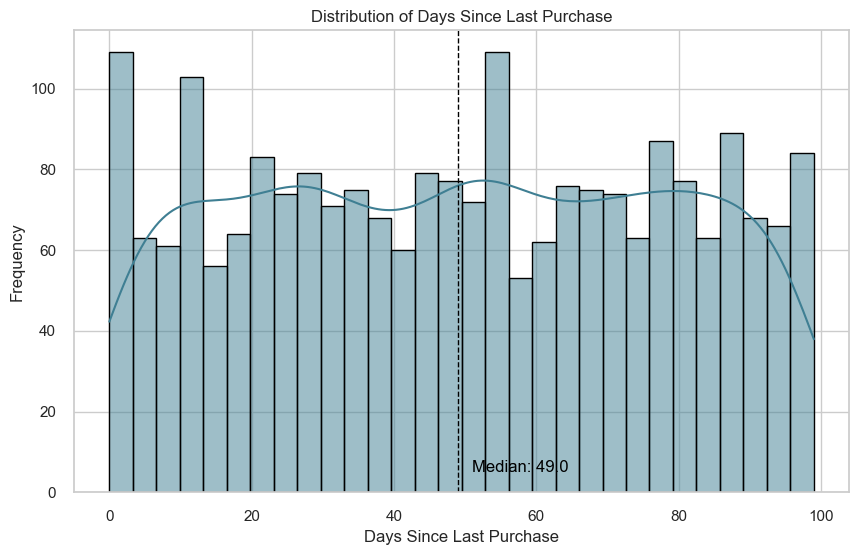

In [22]:
# Histogram of Recency

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='Recency', bins=30, kde=True, color=color1, edgecolor='black')
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Adding a vertical line to show the median or mean recency to provide a reference point
median_recency = ds['Recency'].median()
plt.axvline(median_recency, color="black", linestyle='dashed', linewidth=1)
plt.text(median_recency+2, 5, f'Median: {median_recency}', color = 'black', fontsize=12)

plt.show()

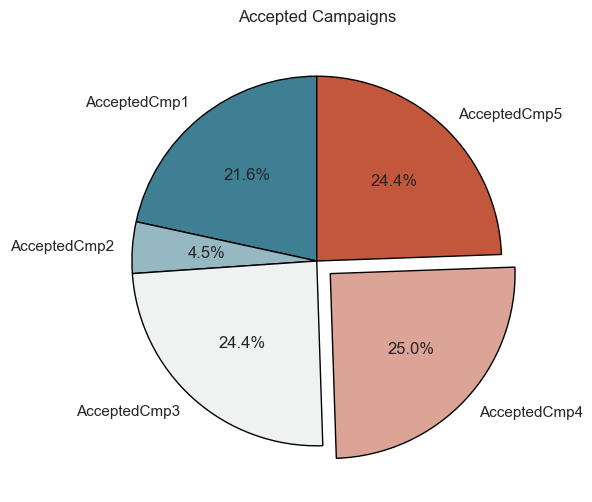

In [23]:
# Pie Chart of Campaign Acceptance

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_accepted = ds[campaign_columns].sum()

plt.figure(figsize=(6, 6))
plt.pie(campaign_accepted, labels=campaign_accepted.index, autopct='%1.1f%%', startangle=90,
        colors=campaign_colors, explode=[0.1 if max(campaign_accepted) == x else 0 for x in campaign_accepted], wedgeprops={'edgecolor': 'black'})

plt.title('Accepted Campaigns')

plt.show()

<Figure size 1200x800 with 0 Axes>

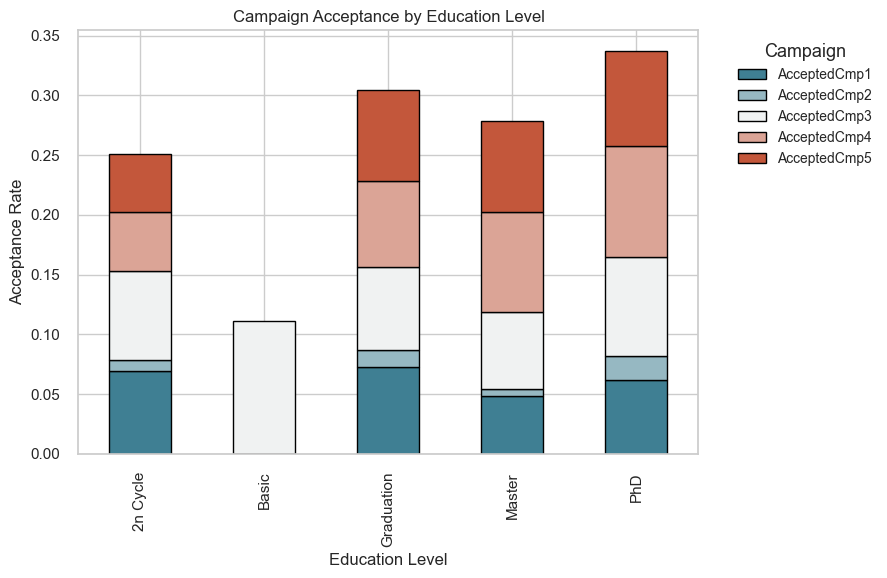

In [24]:
# Stacked Bar Chart of Campaign Acceptance by Education Level

campaign_education = ds.groupby('Education')[campaign_columns].mean()

plt.figure(figsize=(12, 8))

campaign_education.plot(kind='bar', color=campaign_colors, edgecolor='black', stacked=True)
plt.title('Campaign Acceptance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate')



plt.legend(title='Campaign', fontsize=10, title_fontsize='13', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

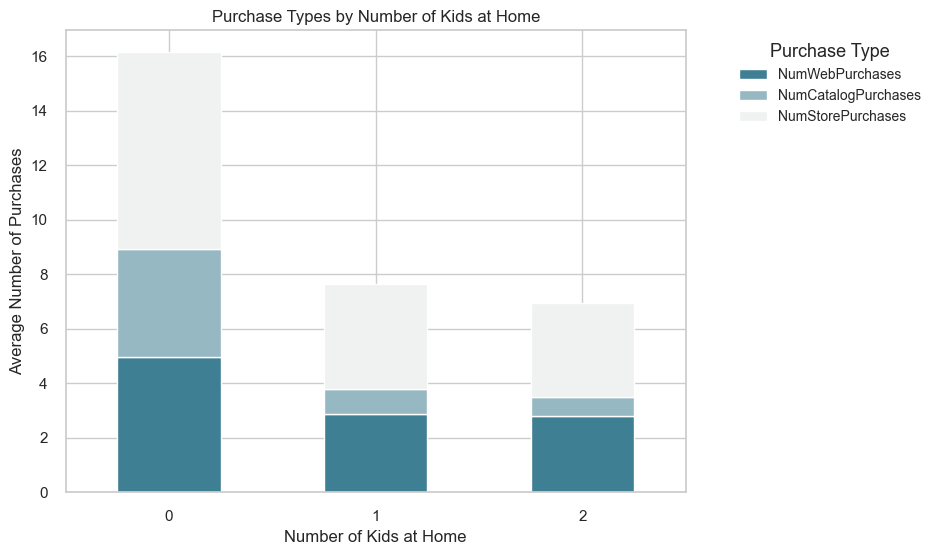

In [25]:
#Stacked Bar Chart of Purchase Types

purchase_types = ds.groupby('Kidhome')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

purchase_types.plot(kind='bar', stacked=True, figsize=(8, 6), color=[color1, color2, color3])
plt.title('Purchase Types by Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=0)

plt.legend(title='Purchase Type', fontsize=10, title_fontsize='13', loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

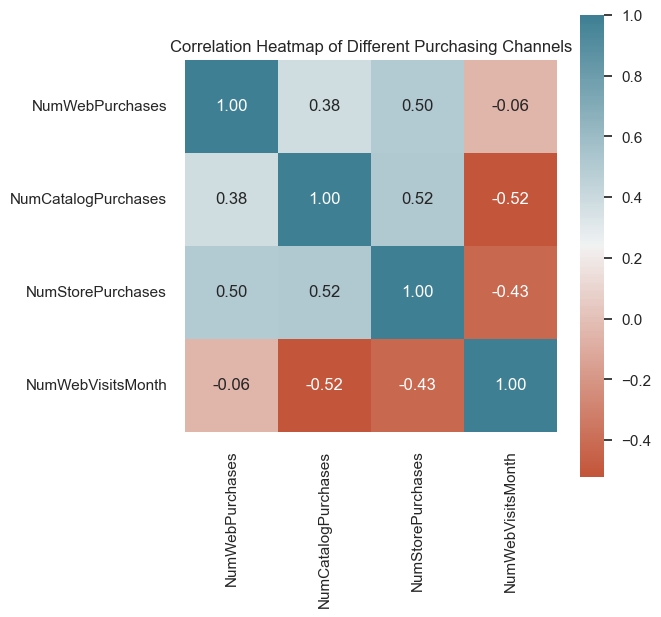

In [26]:
# Heatmap of Purchasing Channels

purchase_channels = ds[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

plt.figure(figsize=(6, 6))
sns.heatmap(purchase_channels.corr(), annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True)
plt.title('Correlation Heatmap of Different Purchasing Channels')

plt.show()

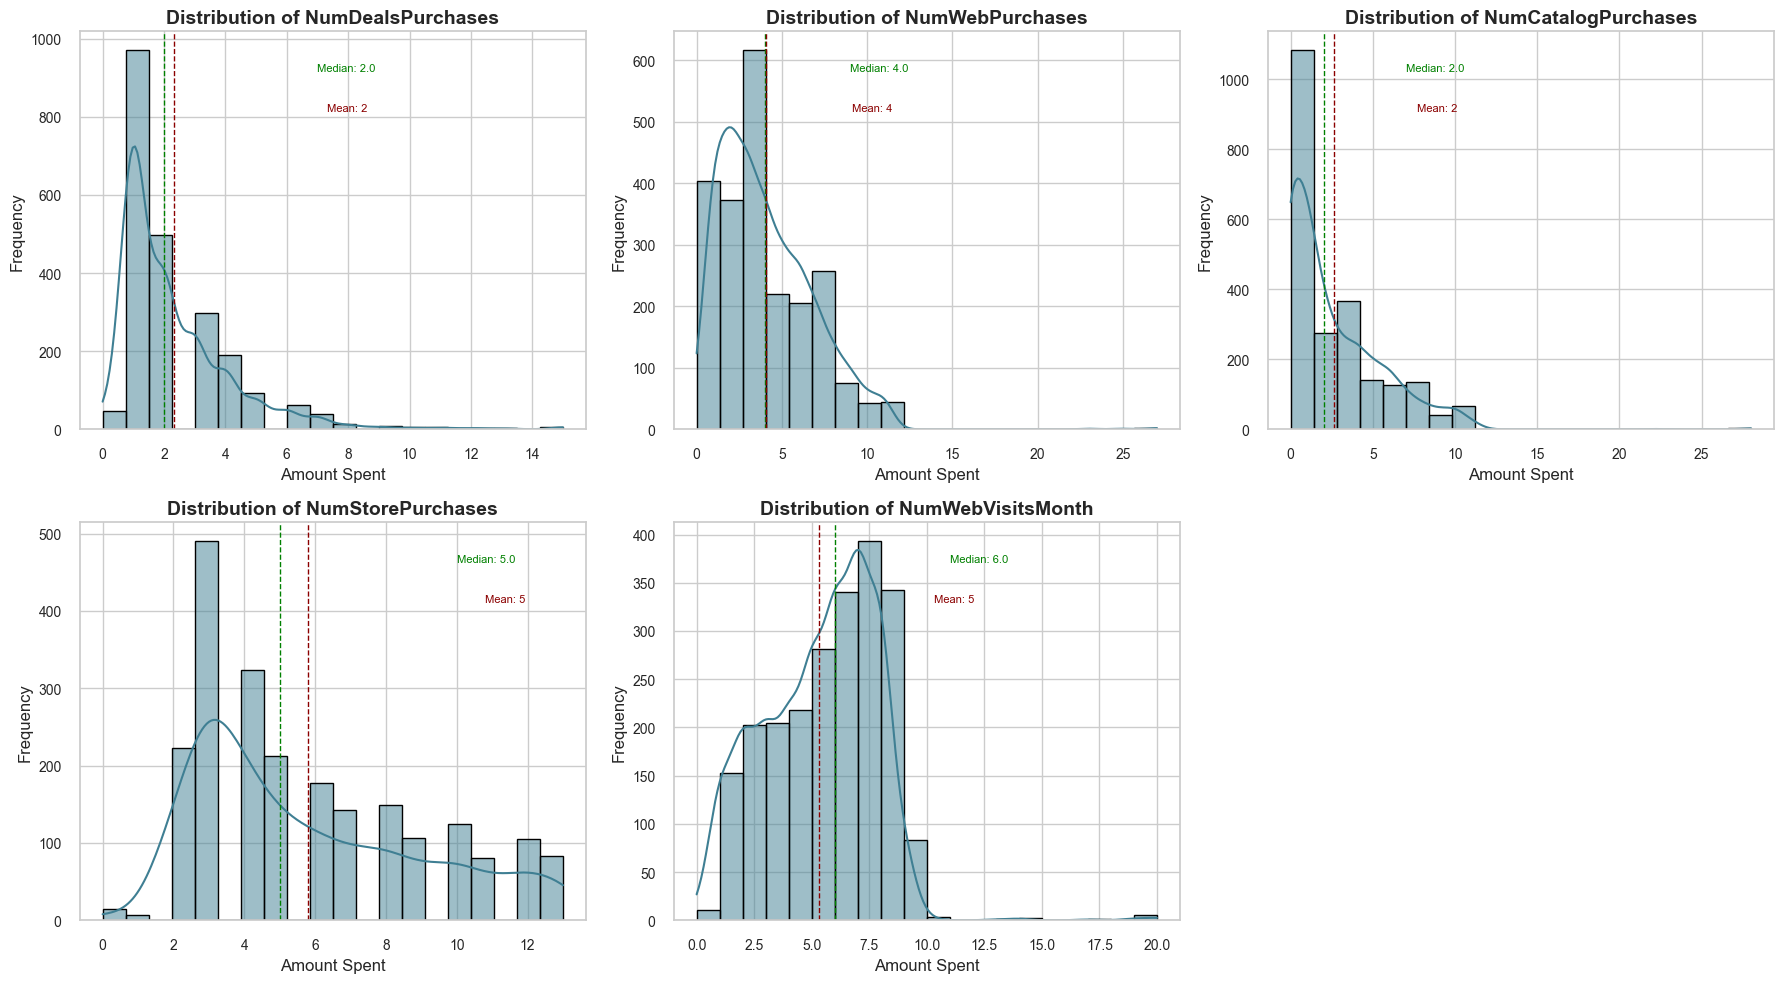

In [27]:
# Distribution of other numeric variables

columns_numpur = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(18, 10))

for i, col in enumerate(columns_numpur, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=ds, x=col, bins=20, kde=True, color=color1, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Amount Spent', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    median_value = ds[col].median()
    mean_value = ds[col].mean()

    # Display the median as a vertical line
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
    plt.text(median_value + 5, plt.ylim()[1] * 0.9, f'Median: {median_value}', color = 'green', fontsize=8)

    # Display the mean as a vertical line
    plt.axvline(mean_value, color='darkred', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, plt.ylim()[1] * 0.8, f'Mean: {int(mean_value)}', color = 'darkred', fontsize=8)

plt.tight_layout() 
plt.show()

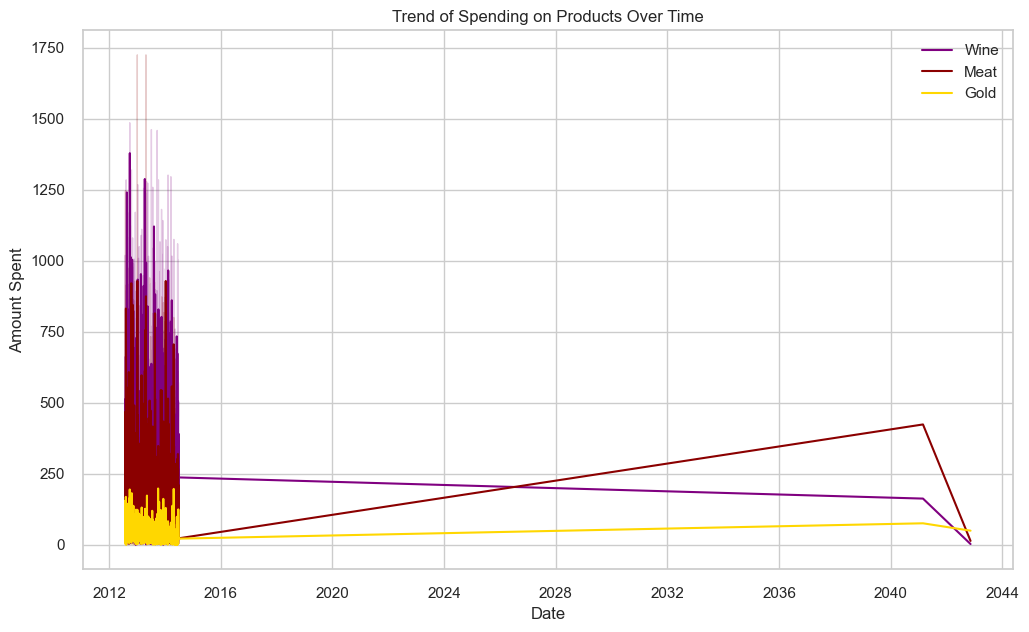

In [28]:
# Line Plot of Average Spending on Products Over Time

#Ensure 'Dt_Customer' is properly sorted and indexed
ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'])
ds.sort_values('Dt_Customer', inplace=True)

plt.figure(figsize=(12, 7))
sns.lineplot(data=ds, x='Dt_Customer', y='MntWines', label='Wine', color="purple")
sns.lineplot(data=ds, x='Dt_Customer', y='MntMeatProducts', label='Meat', color="darkred")
sns.lineplot(data=ds, x='Dt_Customer', y='MntGoldProds', label='Gold', color="gold")

plt.title('Trend of Spending on Products Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Spent')

plt.legend()
plt.show()

# Data Preparation

In [29]:
# Create a copy of the original dataset to ensure that all subsequent changes are made on the duplicated dataset
X = ds.copy(deep=True)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1255 to 46
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2237 non-null   float64       
 10  MntFruits            2238 non-null   float64       
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-null   

In [31]:
# Check for uniqueness in 'ID'

if X['ID'].is_unique:
    # Set 'ID' column as the index
    X.set_index('ID', inplace=True)

    # Sort the index
    X.sort_index(inplace=True)

    # Verify the dataset after setting the index and sorting
    print(X.head(10))
else:
    print("ID is not unique. Further investigation needed.")

    Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                      
0         1985  Graduation        Married  70951.0        0         0   
1         1961  Graduation         Single  57091.0        0         0   
9         1975      Master         Single  46098.0        1         1   
13        1947         PhD          Widow  25358.0        0         1   
17        1971         PhD        Married  60491.0        0         1   
20        1965    2n Cycle        Married  46891.0        0         1   
22        1976  Graduation       Divorced  46310.0        1         0   
24        1960      Master       Together  17144.0        1         1   
25        1958  Graduation        Married  65148.0        0         1   
35        1987  Graduation        Married  25545.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                            ...  

In [32]:
# Remove the columns 'Z_CostContact' and 'Z_Revenue' since all the values are the same, which will not help to detect any patterns in the data
X = X.drop(columns=['Z_CostContact', 'Z_Revenue'])

### Target Variable Analysis

In [33]:
# Analyze the distribution of the target variable is crucial, especially for classification problems, as it can greatly affect the performance of the models.
# Class imbalance might need special handling to ensure the model doesn't become biased towards the majority class.

# Calculate the distribution of the target variable
target_distribution = X['Response'].value_counts()
proportions = target_distribution / target_distribution.sum()

print("Target Variable Distribution (absolute):", target_distribution)
print("")
print("Target Variable Distribution (propotion):", proportions)

Target Variable Distribution (absolute): Response
0    1906
1     334
Name: count, dtype: int64

Target Variable Distribution (propotion): Response
0    0.850893
1    0.149107
Name: count, dtype: float64


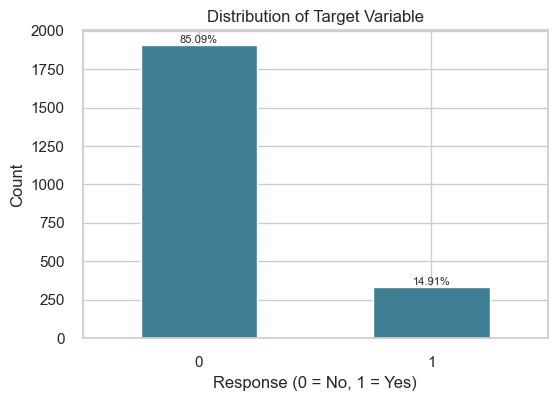

In [34]:
# Plot the distribution of 'Response' to visualize the class imbalance

plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar', title='Distribution of Target Variable', color=color1)
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

for index, value in enumerate(target_distribution):
    plt.text(index, value, f'{proportions[index]:.2%}', ha='center', va='bottom', fontsize=8)

plt.show()

In [35]:
# Suggestion based on the distribution of 'Response' variable

print("Analysis:")
if proportions.min() < 0.20:
    print("There is a significant class imbalance in the dataset. We will later consider some techniques such as SMOTE for oversampling the minority class.")
else:
    print("The class distribution is relatively balanced, which is beneficial for model training.")

Analysis:
There is a significant class imbalance in the dataset. We will later consider some techniques such as SMOTE for oversampling the minority class.


### Correct Data Inconsistencies

In [36]:
# Convert 'Dt_Customer' to datetime and 'Education' and 'Marital_Status' to category

X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'])
X['Education'] = X['Education'].astype('category')
X['Marital_Status'] = X['Marital_Status'].astype('category')

In [37]:
# Filter and display rows with inconsistent values on the column 'Marital_Status'

filtered_rows = X[X['Marital_Status'].isin(['YOLO', 'Alone', 'Absurd'])]
print("Filtered Rows:", filtered_rows)

Filtered Rows:        Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
92           1988  Graduation          Alone  34176.0        1         0   
433          1958      Master          Alone  61331.0        1         1   
492          1973         PhD           YOLO  48432.0        0         1   
4369         1957      Master         Absurd  65487.0        0         0   
7660         1973         PhD          Alone  35860.0        1         1   
7734         1993  Graduation         Absurd  79244.0        0         0   
11133        1973         PhD           YOLO  48432.0        0         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
92     2014-05-12       12       5.0        7.0  ...                    0   
433    2013-03-10       42     534.0        5.0  ...                 

In [38]:
# Update inconsistent values by transforming values 'Alone' into 'Single' and setting 'YOLO' and 'Absurd' values to missing (NA)

X.loc[X['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
X.loc[X['Marital_Status'].isin(['YOLO', 'Absurd']), 'Marital_Status'] = pd.NA

# Verify the changes

print("Updated Marital Status Distribution:")
print(X['Marital_Status'].value_counts())

Updated Marital Status Distribution:
Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Absurd        0
Alone         0
YOLO          0
Name: count, dtype: int64


In [39]:
na_count = X['Marital_Status'].isna().sum()
print(f"Number of NAs in Marital Status: {na_count}")

Number of NAs in Marital Status: 4


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 11191
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   category      
 2   Marital_Status       2236 non-null   category      
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2237 non-null   float64       
 9   MntFruits            2238 non-null   float64       
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2187 non-null   

### Handle Missing Values

In [41]:
# Calculate the mode of the 'Marital_Status' column
marital_status_mode = X['Marital_Status'].mode()[0]

# Fill in missing values with the mode - Given the small percentage of missing data, mode imputation is a simple and effective choice
X['Marital_Status'].fillna(marital_status_mode, inplace=True)

# Check unique values in the 'Marital_Status' column
print(X['Marital_Status'].unique())

['Married', 'Single', 'Widow', 'Divorced', 'Together']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']


In [42]:
# Initially calculate and print the mean and median before any imputation
print("Before Imputation:")
print("Mean of MntWines:", X['MntWines'].mean())
print("Median of MntWines:", X['MntWines'].median())
print("Mean of MntFruits:", X['MntFruits'].mean())
print("Median of MntFruits:", X['MntFruits'].median())
print("Mean of MntGoldProds:", X['MntGoldProds'].mean())
print("Median of MntGoldProds:", X['MntGoldProds'].median())

Before Imputation:
Mean of MntWines: 303.8386231560125
Median of MntWines: 173.0
Mean of MntFruits: 26.25201072386059
Median of MntFruits: 8.0
Mean of MntGoldProds: 44.59625057155921
Median of MntGoldProds: 25.0


In [43]:
# Based on the histograms of MntWines, MntFruits, and MntGoldProds, all three distributions show a pronounced right skew, which is typical for expenditure data where a large number of people spend little, and a few spend a lot.

# MntWines: The median is 173.0, while the mean is 303. Given this skew, median imputation remains the best choice as it is less sensitive to outliers and provides a more robust central value that represents the "typical" customer spending.
# MntFruits: Similarly, the median is 8.0, much lower than the mean of 26. This also indicates a right-skewed distribution with the mean affected by higher values. Again, median imputation is advisable.
# MntGoldProds: This variable shows a sharp peak at the lower values and a quick drop-off, with very few high values. The skew is significant, making median imputation the best choice to avoid pulling the typical spend value toward the tail.

# Median imputation for skewed distributions
X['MntWines'] = X['MntWines'].fillna(X['MntWines'].median())
X['MntFruits'] = X['MntFruits'].fillna(X['MntFruits'].median())
X['MntGoldProds'] = X['MntGoldProds'].fillna(X['MntGoldProds'].median())

# Confirming that are no more missing values
print(X[['MntWines', 'MntFruits', 'MntGoldProds']].isnull().sum())

# Also, using the median helps maintain the shape of the distribution.

MntWines        0
MntFruits       0
MntGoldProds    0
dtype: int64


In [44]:
# Recalculate and print the mean and median after imputation
print("After Imputation:")
print("Mean of MntWines:", X['MntWines'].mean())
print("Median of MntWines:", X['MntWines'].median())
print("Mean of MntFruits:", X['MntFruits'].mean())
print("Median of MntFruits:", X['MntFruits'].median())
print("Mean of MntGoldProds:", X['MntGoldProds'].mean())
print("Median of MntGoldProds:", X['MntGoldProds'].median())

After Imputation:
Mean of MntWines: 303.66339285714287
Median of MntWines: 173.0
Mean of MntFruits: 26.235714285714284
Median of MntFruits: 8.0
Mean of MntGoldProds: 44.13258928571429
Median of MntGoldProds: 25.0


In [45]:
# Attempt to use KNN imputation to fill missing values in 'MntGoldProds' column
# imputer = KNNImputer(n_neighbors=5)
# X['MntGoldProds'] = imputer.fit_transform(X[['MntGoldProds']])

# Despite having a few missing values (2187 non-null out of 2240), we opted for median imputation instead of methods like KNN.
# The decision was based on the observation that using median imputation didn't lead to substantial changes in statistical measures like the median and mean.

In [46]:
# Calculate the median of Income
income_mean = X['Income'].mean()
print('Mean of Income:', income_mean)
income_median = X['Income'].median()
print('Median of Income:', income_median)

# Perform median imputation for missing values in Income
X['Income'] = X['Income'].fillna(income_median)

# Median vs. Mean: Observing the difference between these measures in a skewed distribution reaffirms the choice of median for imputation.
# Once again, using the median helps maintain the integrity of the dataset by not allowing outliers to disproportionately influence the fill value for missing data.

# Print the total number of missing values and percentage after imputation
missing_total = X['Income'].isnull().sum()
missing_percentage = (missing_total / len(X)) * 100

print(f"Total missing values in Income after imputation: {missing_total}")
print(f"Percentage of missing values in Income after imputation: {missing_percentage:.2f}%")

# Ensure there are no more missing values
assert missing_total == 0, "There are still missing values in Income!"

Mean of Income: 52247.25135379061
Median of Income: 51381.5
Total missing values in Income after imputation: 0
Percentage of missing values in Income after imputation: 0.00%


### Treat Skewness and Handle Outliers

**Strategies to Treat Skewness:**
- Log Transformation: This is a popular method for reducing right skewness. It’s effective when data spans several orders of magnitude and can help stabilize the variance.
- Square Root Transformation: This transformation can be useful when the data contains zeros (which log transformations cannot handle) or negative values after some constant shift.
- Box-Cox Transformation: This is a more generalized approach that can handle and correct skewness in a variety of distributions, assuming the data is positive.

In [47]:
# Iterate over the specified columns and adjust non-positive or non-finite values
for col in product_columns:
    # Check for non-positive or non-finite values
    if (X[col] <= 0).any() or not np.all(np.isfinite(X[col])):
        print(f"Adjusting {col} because it contains zero, negative, or non-finite values.")

        # Replace zero or negative values with a small positive number
        X[col] = X[col].apply(lambda x: 1 if x <= 0 else x)
        
        # Also handle any infinite values by replacing them with NaN, and then forward filling or using another method
        X[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        X[col].fillna(method='ffill', inplace=True)  # Forward fill or choose another appropriate method

# Now apply the logarithmic transformation
for col in product_columns:
    X[col + '_log'] = np.log1p(X[col])

Adjusting MntWines because it contains zero, negative, or non-finite values.
Adjusting MntFruits because it contains zero, negative, or non-finite values.
Adjusting MntMeatProducts because it contains zero, negative, or non-finite values.
Adjusting MntFishProducts because it contains zero, negative, or non-finite values.
Adjusting MntSweetProducts because it contains zero, negative, or non-finite values.
Adjusting MntGoldProds because it contains zero, negative, or non-finite values.


In [48]:
# Verify no negative or non-finite values remain
for col in product_columns:
    if (X[col] <= 0).any() or not np.all(np.isfinite(X[col])):
        print(f"Column {col} still has non-finite or non-positive values.")
    else:
        print(f"Column {col} is now ready for transformation.")

Column MntWines is now ready for transformation.
Column MntFruits is now ready for transformation.
Column MntMeatProducts is now ready for transformation.
Column MntFishProducts is now ready for transformation.
Column MntSweetProducts is now ready for transformation.
Column MntGoldProds is now ready for transformation.


In [49]:
# Create a list of only the log-transformed column names
log_transformed_columns = [col + '_log' for col in product_columns]

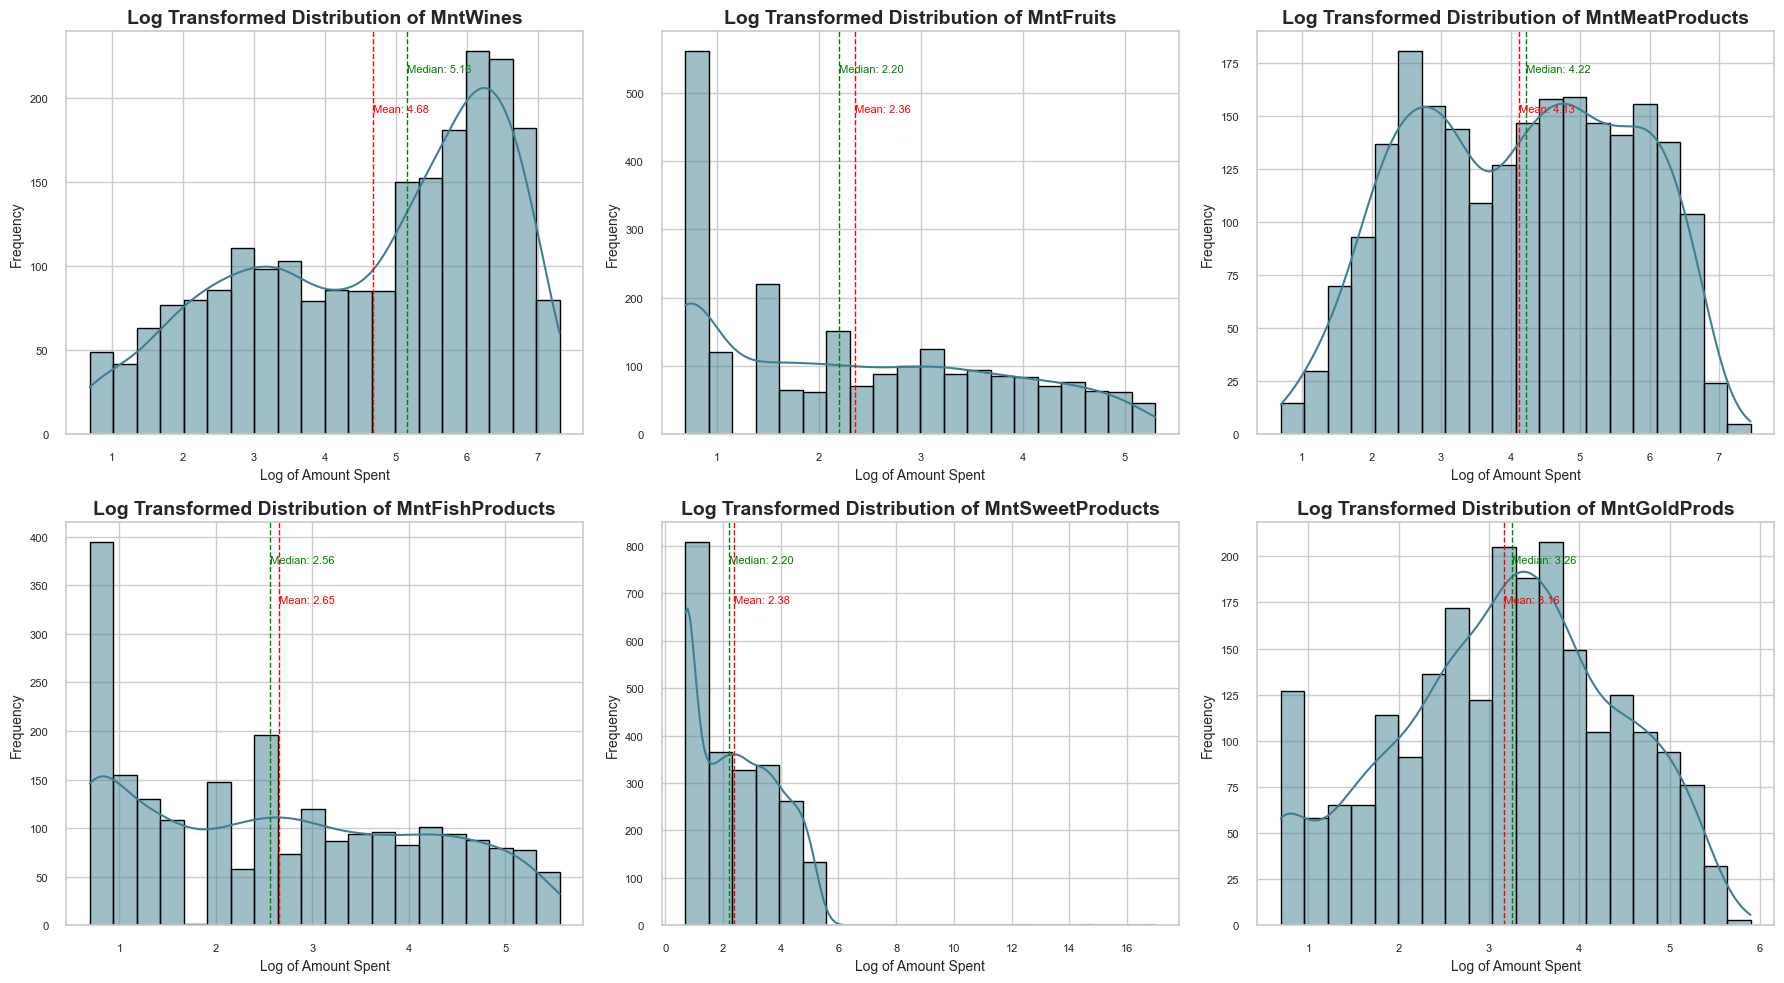

In [50]:
# Plot the transformed distributions
plt.figure(figsize=(18, 10)) 

for i, col in enumerate(product_columns, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data=X, x=col + '_log', bins=20, kde=True, color=color1, edgecolor='black')
    plt.title(f'Log Transformed Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Log of Amount Spent', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add median and mean lines for transformed data
    median_value_log = X[col + '_log'].median()
    mean_value_log = X[col + '_log'].mean()
    plt.axvline(median_value_log, color='green', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value_log, color='red', linestyle='dashed', linewidth=1)
    plt.text(median_value_log, plt.ylim()[1] * 0.9, f'Median: {median_value_log:.2f}', color='green', fontsize=8)
    plt.text(mean_value_log, plt.ylim()[1] * 0.8, f'Mean: {mean_value_log:.2f}', color='red', fontsize=8)

plt.tight_layout()
plt.show()

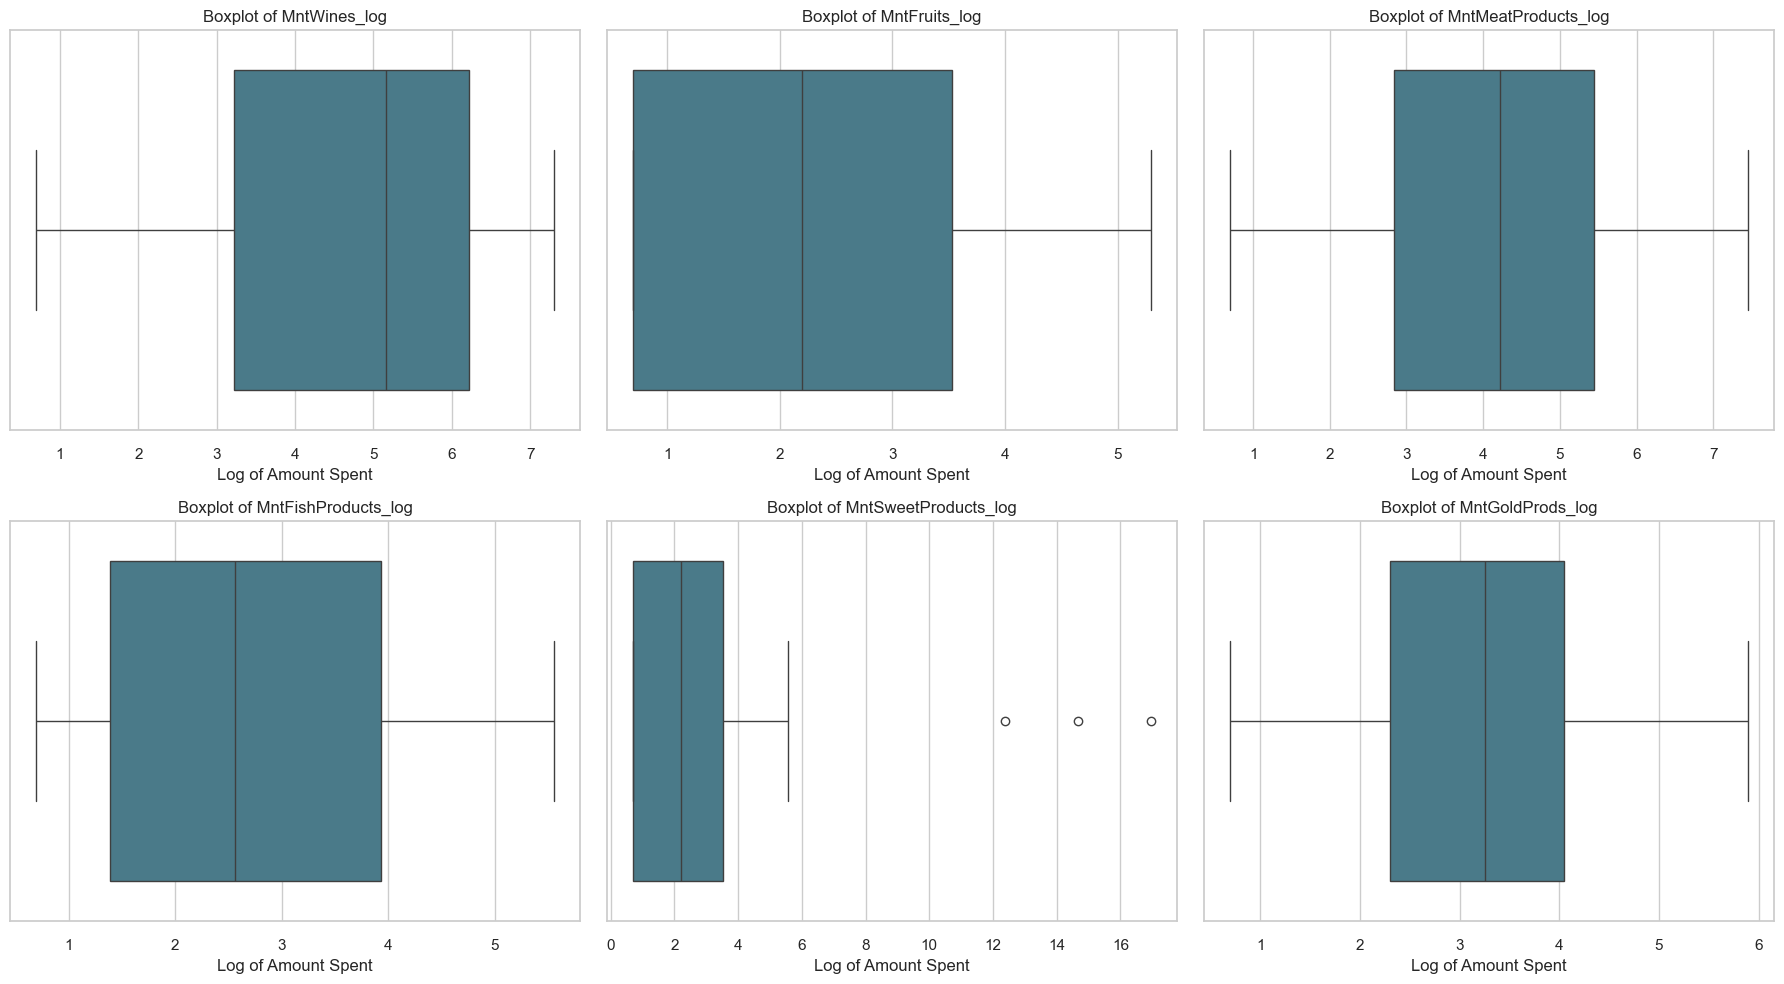

In [51]:
# Plot boxplots again to identify outliers

plt.figure(figsize=(18, 10))

log_transformed_columns = [col + '_log' for col in product_columns]

for i, col in enumerate(log_transformed_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=X[col], color=color1)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Log of Amount Spent')

plt.tight_layout()
plt.show()

In [52]:
# Drop the old columns from DataFrame
X.drop(product_columns, axis=1, inplace=True)

In [53]:
# Treat the outliers in MntSweetProducts

def cap_outliers(series, whisker_width=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (whisker_width * IQR)
    upper_bound = Q3 + (whisker_width * IQR)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping to MntSweetProducts
X['MntSweetProducts_log'] = cap_outliers(X['MntSweetProducts_log'])

# Print the effects after capping
print("Outlier treatment done for MntSweetProducts. Description:")
print(X['MntSweetProducts_log'].describe())

Outlier treatment done for MntSweetProducts. Description:
count    2240.000000
mean        2.373656
std         1.437280
min         0.693147
25%         0.693147
50%         2.197225
75%         3.533607
max         7.794298
Name: MntSweetProducts_log, dtype: float64


In [54]:
# Check for anomalies in 'Year_Birth'
print("Earliest birth year:", X['Year_Birth'].min())
print("Latest birth year:", X['Year_Birth'].max())

Earliest birth year: 1893
Latest birth year: 1996


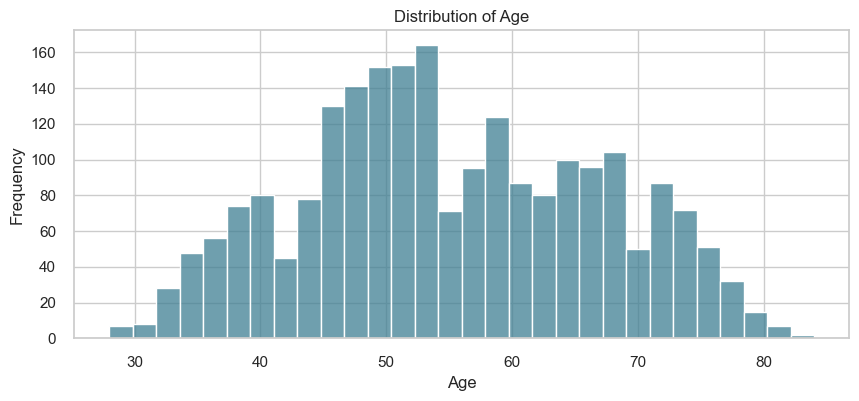

In [55]:
# Current year
current_year = datetime.now().year

# Calculate ages
X['Age'] = current_year - X['Year_Birth']
X = X.drop(columns=['Year_Birth'])

# Identify age outliers
age_outliers_index = X[(X['Age'] < 0) | (X['Age'] > 85)].index
X = X.drop(age_outliers_index)

plt.figure(figsize=(10, 4))
sns.histplot(X['Age'], bins=30, kde=False, color=color1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 11191
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Education             2237 non-null   category      
 1   Marital_Status        2237 non-null   category      
 2   Income                2237 non-null   float64       
 3   Kidhome               2237 non-null   int64         
 4   Teenhome              2237 non-null   int64         
 5   Dt_Customer           2237 non-null   datetime64[ns]
 6   Recency               2237 non-null   int64         
 7   NumDealsPurchases     2237 non-null   int64         
 8   NumWebPurchases       2237 non-null   int64         
 9   NumCatalogPurchases   2237 non-null   int64         
 10  NumStorePurchases     2237 non-null   int64         
 11  NumWebVisitsMonth     2237 non-null   int64         
 12  AcceptedCmp3          2237 non-null   int64         
 13  AcceptedCmp4          

In [57]:
# Calculate the IQR and the upper bound (Q3 + 1.5 * IQR)
Q1 = X['Income'].quantile(0.25)
Q3 = X['Income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter to find values greater than this upper bound
high_income_values = X[X['Income'] > upper_bound]

# Display the high income values and the upper bound
high_income_values['Income'].sort_values(), upper_bound

(ID
 5555     153924.0
 11181    156924.0
 4931     157146.0
 8475     157243.0
 5336     157733.0
 1501     160803.0
 1503     162397.0
 9432     666666.0
 Name: Income, dtype: float64,
 117418.0)

In [58]:
# Remove the most extreme outlier because it significantly skews our analysis
X = X[X['Income'] != 666666]

In [59]:
# Winsorize income values at the 95th percentile
# This method is preferred over complete removal because it reduces the potential loss of data, retaining the bulk of data while minimizing the influence of extreme values.
X['Winsorized_Income'] = winsorize(X['Income'], limits=[0, 0.05])

# Compare the original and winsorized income distributions
X[['Income', 'Winsorized_Income']].describe()

Income  Winsorized_Income
count    2236.000000        2236.000000
mean    51952.614043       51444.717352
std     21411.466851       20140.456329
min      1730.000000        1730.000000
25%     35502.500000       35502.500000
50%     51381.500000       51381.500000
75%     68275.750000       68275.750000
max    162397.000000       83917.000000

In [60]:
X = X.drop(columns=['Income'])

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 11191
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Education             2236 non-null   category      
 1   Marital_Status        2236 non-null   category      
 2   Kidhome               2236 non-null   int64         
 3   Teenhome              2236 non-null   int64         
 4   Dt_Customer           2236 non-null   datetime64[ns]
 5   Recency               2236 non-null   int64         
 6   NumDealsPurchases     2236 non-null   int64         
 7   NumWebPurchases       2236 non-null   int64         
 8   NumCatalogPurchases   2236 non-null   int64         
 9   NumStorePurchases     2236 non-null   int64         
 10  NumWebVisitsMonth     2236 non-null   int64         
 11  AcceptedCmp3          2236 non-null   int64         
 12  AcceptedCmp4          2236 non-null   int64         
 13  AcceptedCmp5          

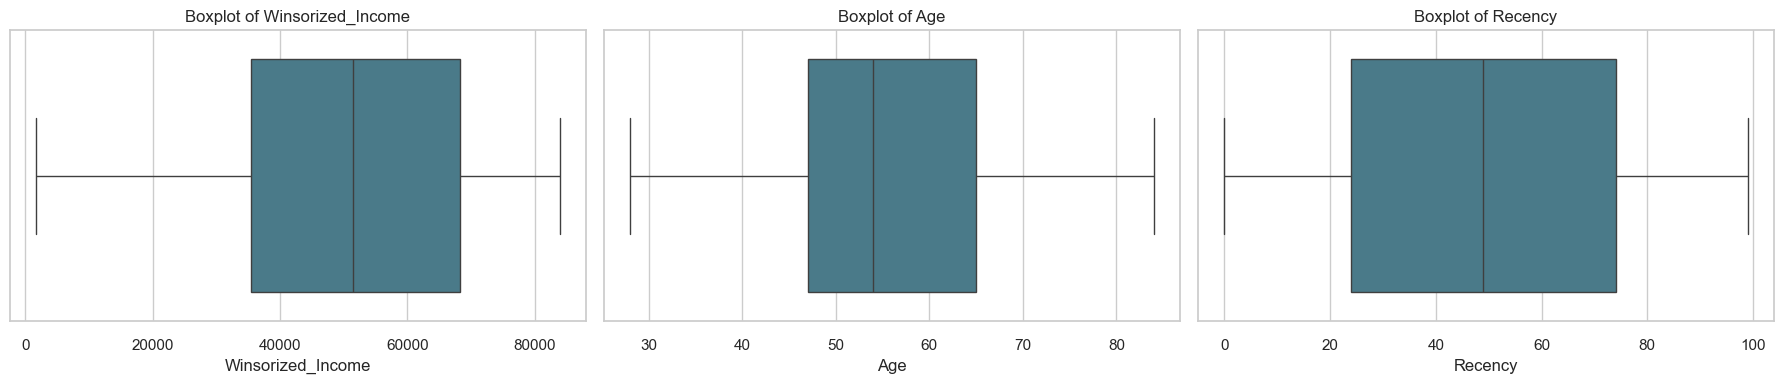

In [62]:
# Plot columns once again to understand how the treated variables are performing
plot_columns_1 = ['Winsorized_Income', 'Age', 'Recency']

plt.figure(figsize=(18, 4))

for index, column in enumerate(plot_columns_1, 1):
    plt.subplot(1, 3, index)
    sns.boxplot(x=X[column], color=color1)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

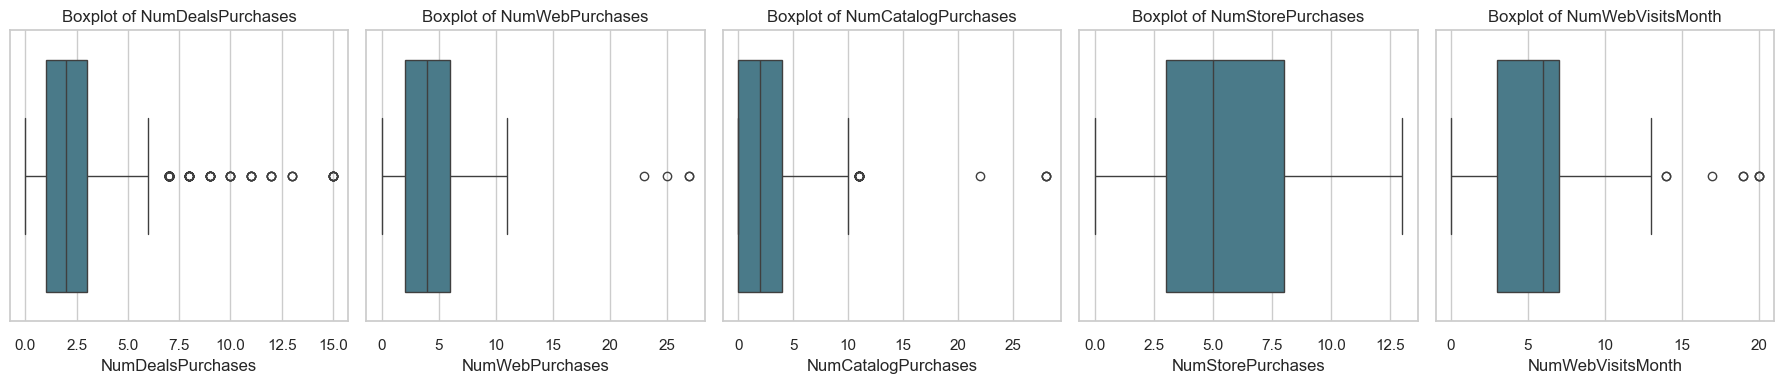

In [63]:
# Plot the remaining numeric columns

plt.figure(figsize=(18, 4))

for index, column in enumerate(columns_numpur, 1):
    plt.subplot(1, 5, index)
    sns.boxplot(x=X[column], color=color1)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

When planning to use techniques like SMOTE for handling class imbalances in a dataset, it's wise to address outliers beforehand. Since SMOTE works by creating synthetic samples from the minority class based on those that already exist, if outliers are present, they might lead to the generation of synthetic samples that are not representative of the general population.

In [64]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Dictionary to hold the results
outliers_info = {}

# Calculating outliers for each column
for column in columns_numpur:
    n_outliers, lower, upper = calculate_outliers(X, column)
    outliers_info[column] = {'Number of Outliers': n_outliers, 'Lower Bound': lower, 'Upper Bound': upper}

# Print the results
for column, info in outliers_info.items():
    print(f"{column}: {info['Number of Outliers']} outliers (Lower bound: {info['Lower Bound']}, Upper bound: {info['Upper Bound']})")

NumDealsPurchases: 86 outliers (Lower bound: -2.0, Upper bound: 6.0)
NumWebPurchases: 4 outliers (Lower bound: -4.0, Upper bound: 12.0)
NumCatalogPurchases: 23 outliers (Lower bound: -6.0, Upper bound: 10.0)
NumStorePurchases: 0 outliers (Lower bound: -4.5, Upper bound: 15.5)
NumWebVisitsMonth: 8 outliers (Lower bound: -3.0, Upper bound: 13.0)


In [65]:
def cap_outliers(df, column, method='iqr', factor=1.5):
    if method == 'iqr':
        # Calculate the IQR and determine bounds for outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
    else:
        # Use percentiles to define bounds for outlier capping
        lower_bound, upper_bound = df[column].quantile([0.01, 0.99])

    # Cap values at the lower and upper bounds
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

# Apply capping to the specified columns
for column in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']:
    data = cap_outliers(X, column, method='iqr', factor=1.5)

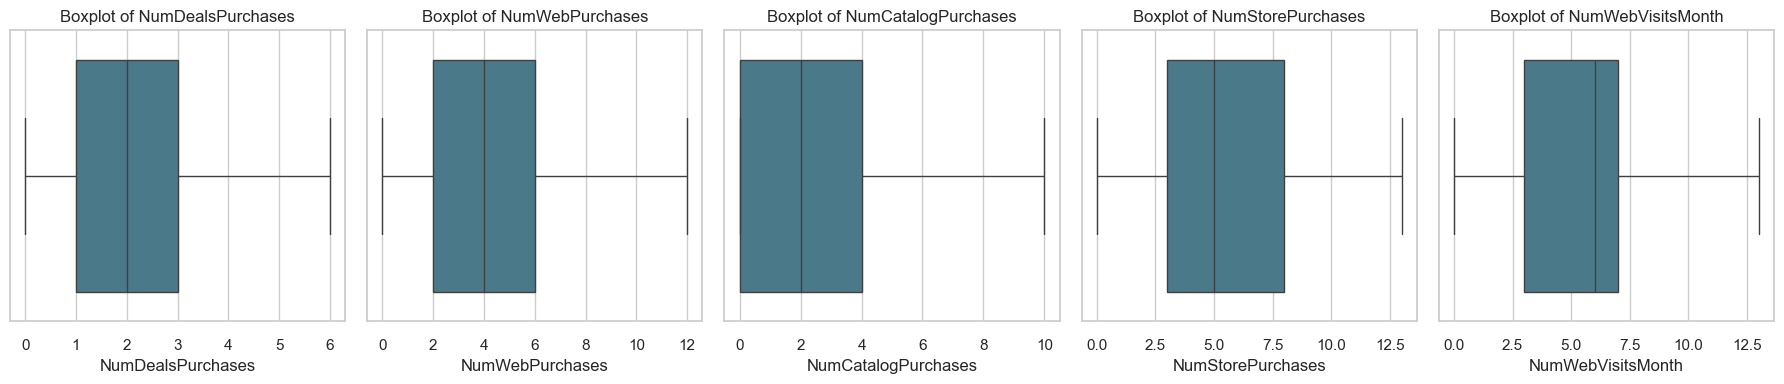

In [66]:
# Plot the numeric columns

plt.figure(figsize=(18, 4))

for index, column in enumerate(columns_numpur, 1):
    plt.subplot(1, 5, index)
    sns.boxplot(x=X[column], color=color1)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 11191
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Education             2236 non-null   category      
 1   Marital_Status        2236 non-null   category      
 2   Kidhome               2236 non-null   int64         
 3   Teenhome              2236 non-null   int64         
 4   Dt_Customer           2236 non-null   datetime64[ns]
 5   Recency               2236 non-null   int64         
 6   NumDealsPurchases     2236 non-null   float64       
 7   NumWebPurchases       2236 non-null   float64       
 8   NumCatalogPurchases   2236 non-null   float64       
 9   NumStorePurchases     2236 non-null   int64         
 10  NumWebVisitsMonth     2236 non-null   float64       
 11  AcceptedCmp3          2236 non-null   int64         
 12  AcceptedCmp4          2236 non-null   int64         
 13  AcceptedCmp5          

### Feature Creation and RFM Scores

In [68]:
# Create several new features based on existing ones to enrich our dataset for analysis

X['MntFood_log'] = X['MntFruits_log'] + X['MntMeatProducts_log'] + X['MntSweetProducts_log'] + X['MntFishProducts_log']
X['Total_Spent'] = X['MntWines_log']+X['MntFruits_log']+X['MntMeatProducts_log']+X['MntFishProducts_log']+X['MntSweetProducts_log']+X['MntGoldProds_log']
X['Total_Children'] = X['Kidhome']+X['Teenhome']
X['Total_Purchases'] = X['NumDealsPurchases']+X['NumWebPurchases']+X['NumCatalogPurchases']+X['NumStorePurchases']
X['Total_Acc'] = X['AcceptedCmp1']+X['AcceptedCmp2']+X['AcceptedCmp3']+X['AcceptedCmp4']+X['AcceptedCmp5']+X['Response']
X['Total_Campaigns'] = X['AcceptedCmp1']+X['AcceptedCmp2']+X['AcceptedCmp3']+X['AcceptedCmp4']+X['AcceptedCmp5']
X['Engagement_Score'] = (X['NumDealsPurchases'] + X['NumWebVisitsMonth'] + X['Total_Acc']) / 7
X['AOV'] = X['Total_Spent'] / X['Total_Purchases']

In [69]:
# Compute customer additional measure - highly correlated to the previous created variables
# X['Avg_Purchase_Frequency'] = (X['NumWebPurchases'] + X['NumCatalogPurchases'] + X['NumStorePurchases']) / 3
# X['AveragePurchaseValue'] = X.Monetary/X.Recency

In [70]:
# Drop redundact columns
X.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

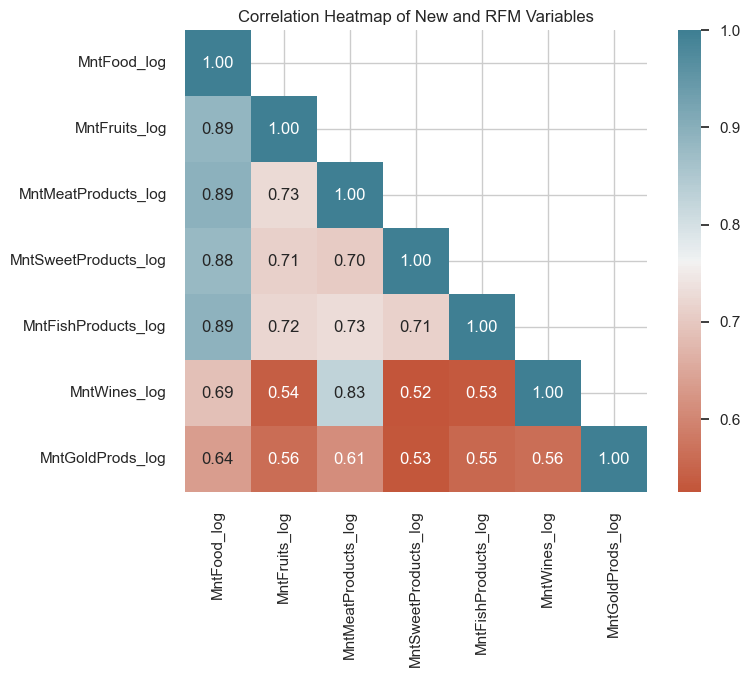

In [71]:
product_columns_log = ['MntFood_log', 'MntFruits_log', 'MntMeatProducts_log','MntSweetProducts_log','MntFishProducts_log', 'MntWines_log', 'MntGoldProds_log']

corr_matrix_prod_log = X[product_columns_log].corr()

mask = np.triu(np.ones_like(corr_matrix_prod_log, dtype=bool), k=1)

# Plot the correlation heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_prod_log, annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of New and RFM Variables')
plt.show()

In [72]:
# Drop the individual food product columns
X.drop(['MntFruits_log', 'MntMeatProducts_log', 'MntSweetProducts_log', 'MntFishProducts_log'], axis=1, inplace=True)

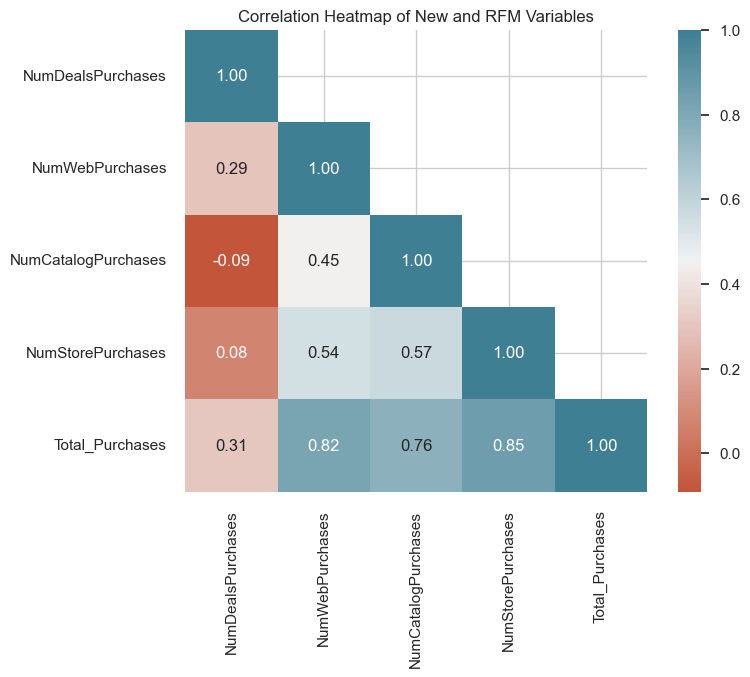

In [73]:
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']

# Calculate the correlation matrix
corr_matrix_purc = X[purchase_columns].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix_purc, dtype=bool), k=1)

# Plot the correlation heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_purc, annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of New and RFM Variables')
plt.show()

In [74]:
# Drop correlated columns
X.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

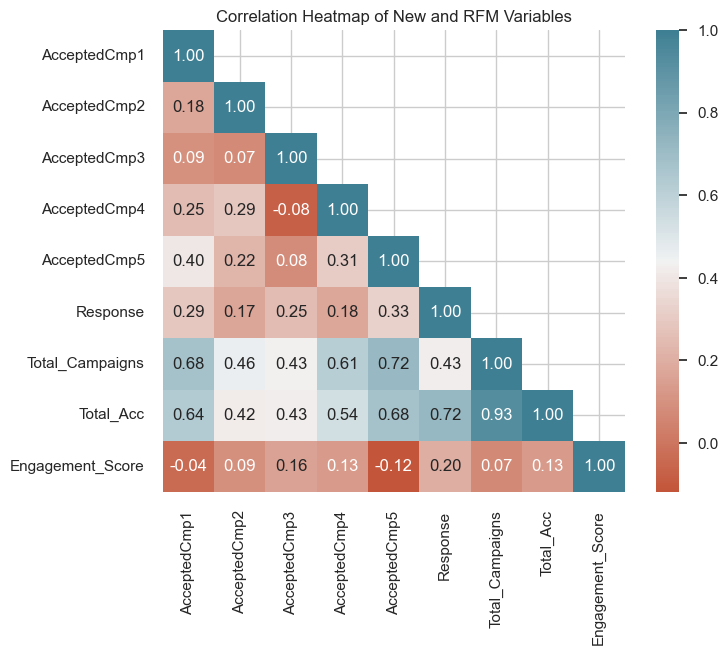

In [75]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_Campaigns', 'Total_Acc', 'Engagement_Score']

# Calculate the correlation matrix
corr_matrix_camp = X[campaign_columns].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix_camp, dtype=bool), k=1)

# Plot the correlation heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_camp, annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of New and RFM Variables')
plt.show()

In [76]:
# Drop 'Total_Acc' column because its (logical) high correlation with other variables and because including the target variable as part of a feature used for prediction introduces data leakage and biases the model
X.drop(['Total_Acc'], axis=1, inplace=True)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 11191
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2236 non-null   category      
 1   Marital_Status     2236 non-null   category      
 2   Dt_Customer        2236 non-null   datetime64[ns]
 3   Recency            2236 non-null   int64         
 4   NumDealsPurchases  2236 non-null   float64       
 5   NumWebVisitsMonth  2236 non-null   float64       
 6   AcceptedCmp3       2236 non-null   int64         
 7   AcceptedCmp4       2236 non-null   int64         
 8   AcceptedCmp5       2236 non-null   int64         
 9   AcceptedCmp1       2236 non-null   int64         
 10  AcceptedCmp2       2236 non-null   int64         
 11  Complain           2236 non-null   int64         
 12  Response           2236 non-null   int64         
 13  MntWines_log       2236 non-null   float64       
 14  MntGoldProds

In [78]:
# Create RFM (Recency, Frequency, Monetary), which are commonly used in customer segmentation analysis

X['Recency'] = X['Recency'] 
X['Frequency'] = X['Total_Purchases']  
X['Monetary'] = X['Total_Spent']

# Recency; Measures how recently a customer made a purchase. Customers who purchased recently are considered more likely to purchase again.
# Frequency: Measures how often a customer makes a purchase. More frequent customers are considered more loyal.
# Monetary: Measures how much money a customer spends. Customers who spend more are considered more valuable.

In [79]:
RFM = X[['Recency', 'Frequency', 'Monetary']]
RFM.head()

Recency  Frequency   Monetary
ID                               
0        66       17.0  28.223436
1         0       18.0  18.518359
9        86       11.0  13.083007
13       57        6.0   9.064158
17       81       27.0  25.706297

In [80]:
X = X.drop(columns=['Dt_Customer'])

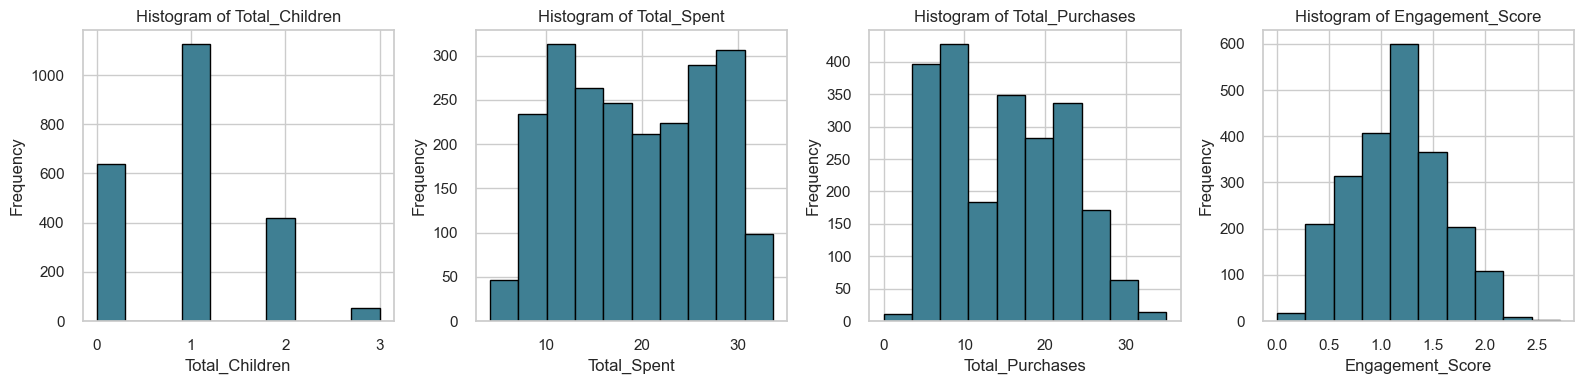

In [81]:
# Plot the distributions of the new variables created

plt.figure(figsize=(16, 4))

new_vars = ['Total_Children', 'Total_Spent', 'Total_Purchases', 'Engagement_Score']

for index, column in enumerate(new_vars, 1):
    plt.subplot(1, 4, index)
    plt.hist(X[column], color=color1, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

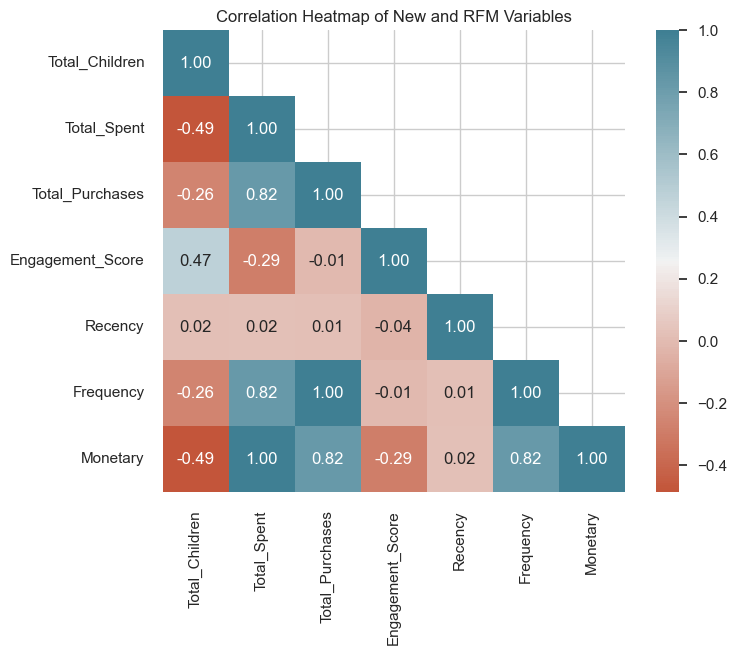

In [82]:
# Correlation analysis of the new variables

all_new = new_vars + ['Recency', 'Frequency', 'Monetary']
subset_X = X[all_new]

# Calculate the correlation matrix
corr_matrix2 = subset_X.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool), k=1)

# Plot the correlation heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of New and RFM Variables')
plt.show()

#### Conclusion
- `Total_Spent` and `Monetary`: Correlation is 1.00, meaning these features are identical, anda that we can keep one and drop the other
- `Total_Purchases` and `Frequency`: Correlation is 1.00, meaning these features are identical, and that we can keep one and drop the other.
- `Total_Spent/Monetary` and `Frequency/Total_Purchases`: While not identical, this high correlation suggests redundancy.
- `Total_Children` and `Engagement_Score`: Moderate correlation (0.47)
- `Recency`: Low correlations with other features, indicating it provides unique information.

In [83]:
X = X.drop(columns=['Total_Spent', 'Total_Purchases'])

In [84]:
# Count of customers who haven't made any purchase
no_purchase_count = (X['Frequency'] == 0).sum()

print("Number of customers who have not made any purchase:", no_purchase_count)

Number of customers who have not made any purchase: 4


In [85]:
# Remove these customers since they're not actual clients
X = X[X['Frequency'] > 0]

In [86]:
# Count of customers who haven't spend any money (just to confrim)
no_money_count = (X['Monetary'] == 0).sum()

print("Number of customers who have not spend any money:", no_money_count)

Number of customers who have not spend any money: 0


In [87]:
# pd.qcut: Divides the column into 5 equal-sized bins

# The labels [5, 4, 3, 2, 1] assign scores where 5 is the highest (most recent) and 1 is the lowest (least recent).
X.loc[:, "R_score"] = pd.qcut(X['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
# Similar to Recency, but here the labels [1, 2, 3, 4, 5] assign scores where 1 is the lowest frequency and 5 is the highest.
X.loc[:, "F_score"] = pd.qcut(X['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
# Same as Frequency, with labels [1, 2, 3, 4, 5] where 1 is the lowest monetary value and 5 is the highest.
X.loc[:, "M_score"] = pd.qcut(X['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combines the R, F, and M scores into a single string score
# Example: a score of '555' represents the best customers across all dimensions, while '111' represents the worst.
X['RFM_Score'] = X['R_score'].astype(int) + X['F_score'].astype(int) + X['M_score'].astype(int)

In [88]:
# Check the distribution of each RFM score to ensure it is divided into 5 equal parts.

print(X['R_score'].value_counts())
print(X['F_score'].value_counts())
print(X['M_score'].value_counts())

R_score
5    456
3    449
4    446
1    444
2    437
Name: count, dtype: int64
F_score
1    553
4    479
3    466
5    391
2    343
Name: count, dtype: int64
M_score
5    447
1    447
3    446
2    446
4    446
Name: count, dtype: int64


In [89]:
RFM_summary = X.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(RFM_summary)

# RFM Score distribution
print(X['RFM_Score'].value_counts().head())

    RFM_Score    Recency  Frequency   Monetary
0           3  88.800000   5.266667   9.405923
1           4  76.504673   5.869159  10.420459
2           5  65.919540   6.804598  11.382887
3           6  51.126904   7.390863  12.093231
4           7  43.250000   8.798246  13.179944
5           8  48.113990  11.875648  16.820573
6           9  52.612069  15.112069  20.002955
7          10  56.545455  18.347826  23.226063
8          11  50.352273  20.034091  24.967140
9          12  37.712919  21.583732  25.697230
10         13  26.308140  22.447674  27.405562
11         14  15.714286  23.693878  28.222795
12         15   9.833333  25.966667  29.190304
RFM_Score
11    264
10    253
9     232
7     228
12    209
Name: count, dtype: int64


Basic Statistics for RFM Components:
           Recency    Frequency     Monetary
count  2236.000000  2236.000000  2236.000000
mean     49.116279    14.700805    19.360406
std      28.957284     7.472690     7.455396
min       0.000000     0.000000     4.158883
25%      24.000000     8.000000    12.567377
50%      49.000000    15.000000    19.179683
75%      74.000000    21.000000    26.231530
max      99.000000    35.000000    33.697922


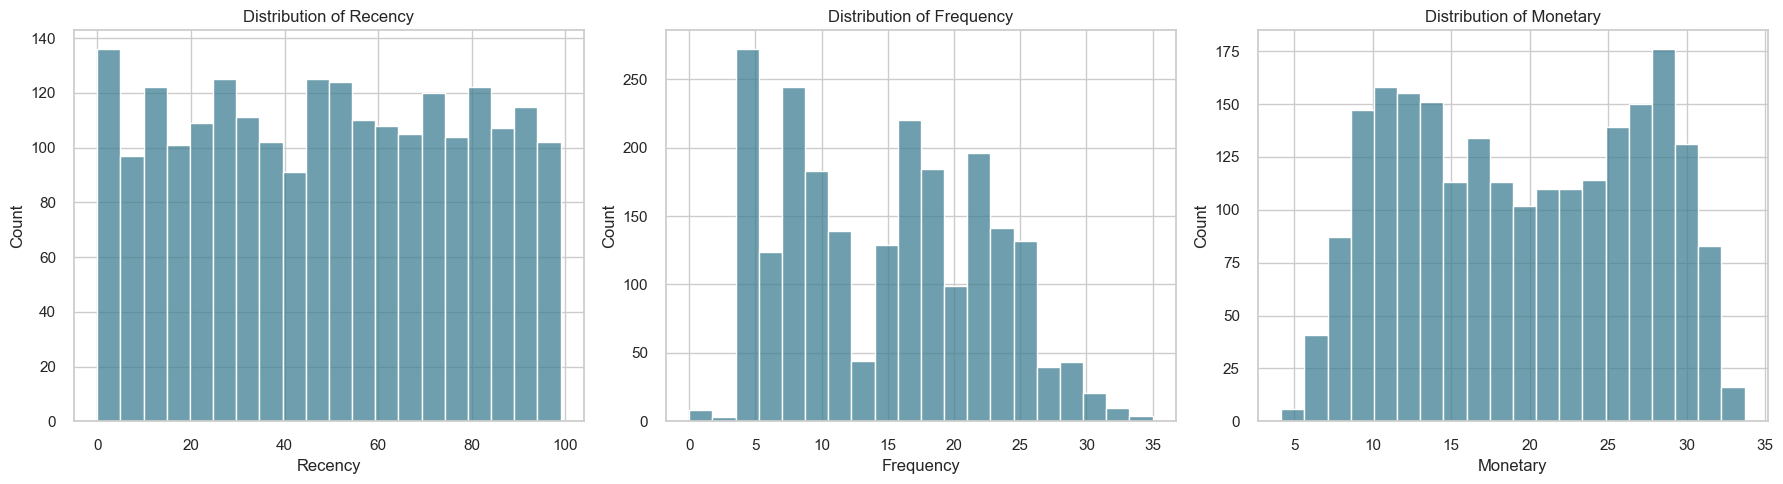

In [90]:
# Check the RFM Scores

# Basic statistics for each RFM component
print("Basic Statistics for RFM Components:")
print(RFM[['Recency', 'Frequency', 'Monetary']].describe())

# Distribution of RFM Scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(RFM['Recency'], bins=20, kde=False, ax=axes[0], color=color1)
axes[0].set_title('Distribution of Recency')

sns.histplot(RFM['Frequency'], bins=20, kde=False, ax=axes[1], color=color1)
axes[1].set_title('Distribution of Frequency')

sns.histplot(RFM['Monetary'], bins=20, kde=False, ax=axes[2], color=color1)
axes[2].set_title('Distribution of Monetary')

plt.tight_layout()
plt.show()

#### Conclusions:**Recency**- The mean recency is approximately 49.12 days, suggesting that on average, customers made their last purchase around 49 days ago.
- The median recency is also 49 days, which means that half of the customers made their last purchase within the last 49 days, and the other half made their last purchase over 49 days ago.- The standard deviation is about 28.96, indicating a relatively high variability in the recency of purchases.
- The recency values range from 0 to 99, indicating a wide range of last purchase intervals among customers.**Frequency**- On average, customers make about 15 transactions.- The standard deviatiom is about 7.4, which is good. The minimum is 1 transaction, which makes sense since we eliminated the ones that haven't purchased. Additionally, we can conclude that half the customers made between 8 and 21 purchases.**Monetary**- The average amount spent by customers is around 19.40 units.- There's a slightly variability in the amount spent. The minimum show us that the least amount spent by a custumer is 4 units, and we can also conclude that customers typically spend between 12.62 and 26.24 units.

In [91]:
# Calculate quartiles
Q1 = X['Recency'].quantile(0.25)
Q3 = X['Recency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = X[(X['Recency'] < lower_bound) | (X['Recency'] > upper_bound)]

print(lower_bound)
print(upper_bound)
print(outliers)

-51.0
149.0
Empty DataFrame
Columns: [Education, Marital_Status, Recency, NumDealsPurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, MntWines_log, MntGoldProds_log, Age, Winsorized_Income, MntFood_log, Total_Children, Total_Campaigns, Engagement_Score, AOV, Frequency, Monetary, R_score, F_score, M_score, RFM_Score]
Index: []

[0 rows x 27 columns]


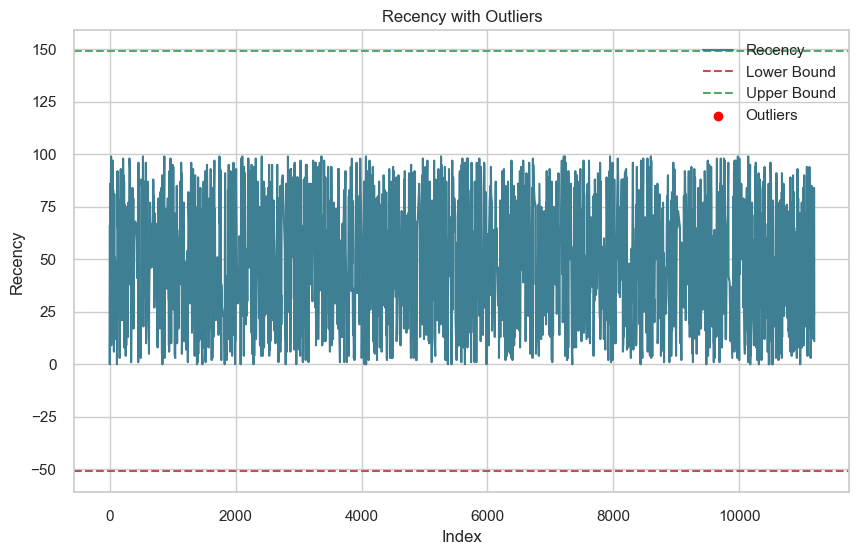

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(X['Recency'], label='Recency', color=color1)
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.scatter(outliers.index, outliers['Recency'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Recency')
plt.title('Recency with Outliers')
plt.legend()
plt.show()

In [93]:
# List of IDs of the rows to be removed
rows_to_remove = [535, 9909]

# Drop the rows with the specified IDs
X = X.drop(rows_to_remove)

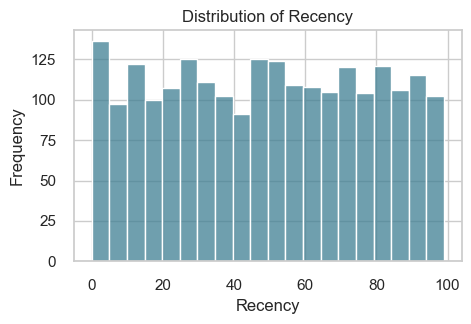

In [94]:
# Distribution of Recency

plt.figure(figsize=(5, 3))
sns.histplot(X['Recency'], bins=20, kde=False, color=color1)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

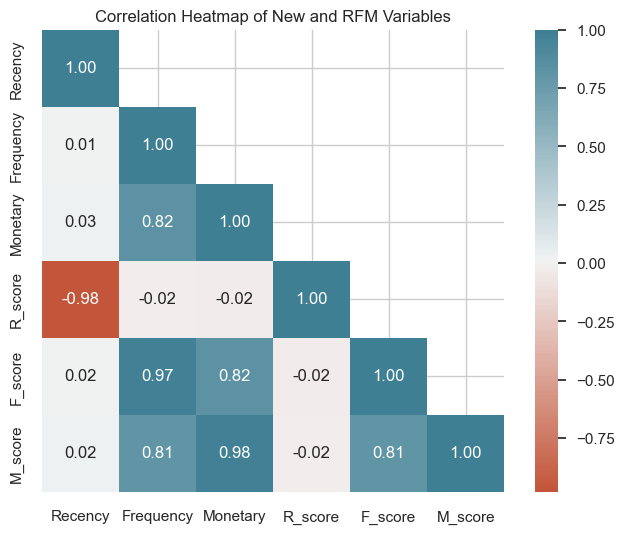

In [95]:
similar_vars = ['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score']
subset_X2 = X[similar_vars]

# Calculate the correlation matrix
corr_matrix3= subset_X2.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix3, dtype=bool), k=1)

# Plot the correlation heatmap with the mask applied
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix3, annot=True, fmt=".2f", cmap=my_palette, cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of New and RFM Variables')
plt.show()

In [96]:
X = X.drop(columns=['Recency', 'Frequency', 'Monetary'])

In [97]:
# Label RFM Combinations
def label_rfm_combination(r_score, f_score, m_score):
    if r_score == 5 and f_score == 5 and m_score == 5:
        return 'Best Customers' #Recently made high-value purchases with high frequency, indicating strong engagement
    elif r_score >= 4 and f_score >= 4 and m_score >= 4:
        return 'Loyal Customers' #Consistently high engagement with the brand, making frequent purchases of significant value
    elif r_score == 5:
        return 'Recent Customers' #Engaged with the brand recently, showing potential for becoming loyal customers
    elif f_score == 5:
        return 'Frequent Customers' #Regularly make purchases, indicating consistent engagement, although not necessarily high-value ones
    elif m_score == 5:
        return 'Big Spenders' #Make high-value purchases, indicating potential for significant revenue generation despite possibly lower frequency
    elif f_score <= 2 and r_score > 2 and m_score > 2:
        return 'Emerging Customers' #Showing potential for growth, with recent engagement and moderate frequency and monetary value
    elif r_score == 3 and f_score == 3 and m_score == 3:
        return 'Need Attention' #Moderate engagement across all metrics, suggesting potential for improvement
    elif r_score <= 2 and f_score <= 2 and m_score <= 2:
        return 'At Risk' #Engagement levels are declining, indicating a need for intervention to prevent loss
    elif r_score == 1 and f_score == 1 and m_score == 1:
        return 'Lost Customers' # Inactive across all metrics, requiring re-engagement strategies
    else:
        return 'Other' #Does not fit into any specific category

X['RFM_Label'] = X.apply(lambda row: label_rfm_combination(row['R_score'], row['F_score'], row['M_score']), axis=1)
print(X[['R_score', 'F_score', 'M_score', 'RFM_Label']].head())

    R_score  F_score  M_score           RFM_Label
ID                                               
0         2        3        5        Big Spenders
1         5        4        3    Recent Customers
9         1        2        2             At Risk
13        3        1        1               Other
17        1        5        4  Frequent Customers


In [98]:
# Count the number of customers in each segment
print(X['RFM_Label'].value_counts())

RFM_Label
Other                 840
Recent Customers      329
At Risk               303
Frequent Customers    250
Loyal Customers       227
Big Spenders          182
Emerging Customers     37
Need Attention         32
Best Customers         30
Name: count, dtype: int64


In [99]:
# X[["RFM_Label", "Recency", "Frequency", "Monetary"]].groupby("RFM_Label").agg(["count", "mean", "std"])

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 11191
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Education          2230 non-null   category
 1   Marital_Status     2230 non-null   category
 2   NumDealsPurchases  2230 non-null   float64 
 3   NumWebVisitsMonth  2230 non-null   float64 
 4   AcceptedCmp3       2230 non-null   int64   
 5   AcceptedCmp4       2230 non-null   int64   
 6   AcceptedCmp5       2230 non-null   int64   
 7   AcceptedCmp1       2230 non-null   int64   
 8   AcceptedCmp2       2230 non-null   int64   
 9   Complain           2230 non-null   int64   
 10  Response           2230 non-null   int64   
 11  MntWines_log       2230 non-null   float64 
 12  MntGoldProds_log   2230 non-null   float64 
 13  Age                2230 non-null   int64   
 14  Winsorized_Income  2230 non-null   float64 
 15  MntFood_log        2230 non-null   float64 
 16  Total_Chil

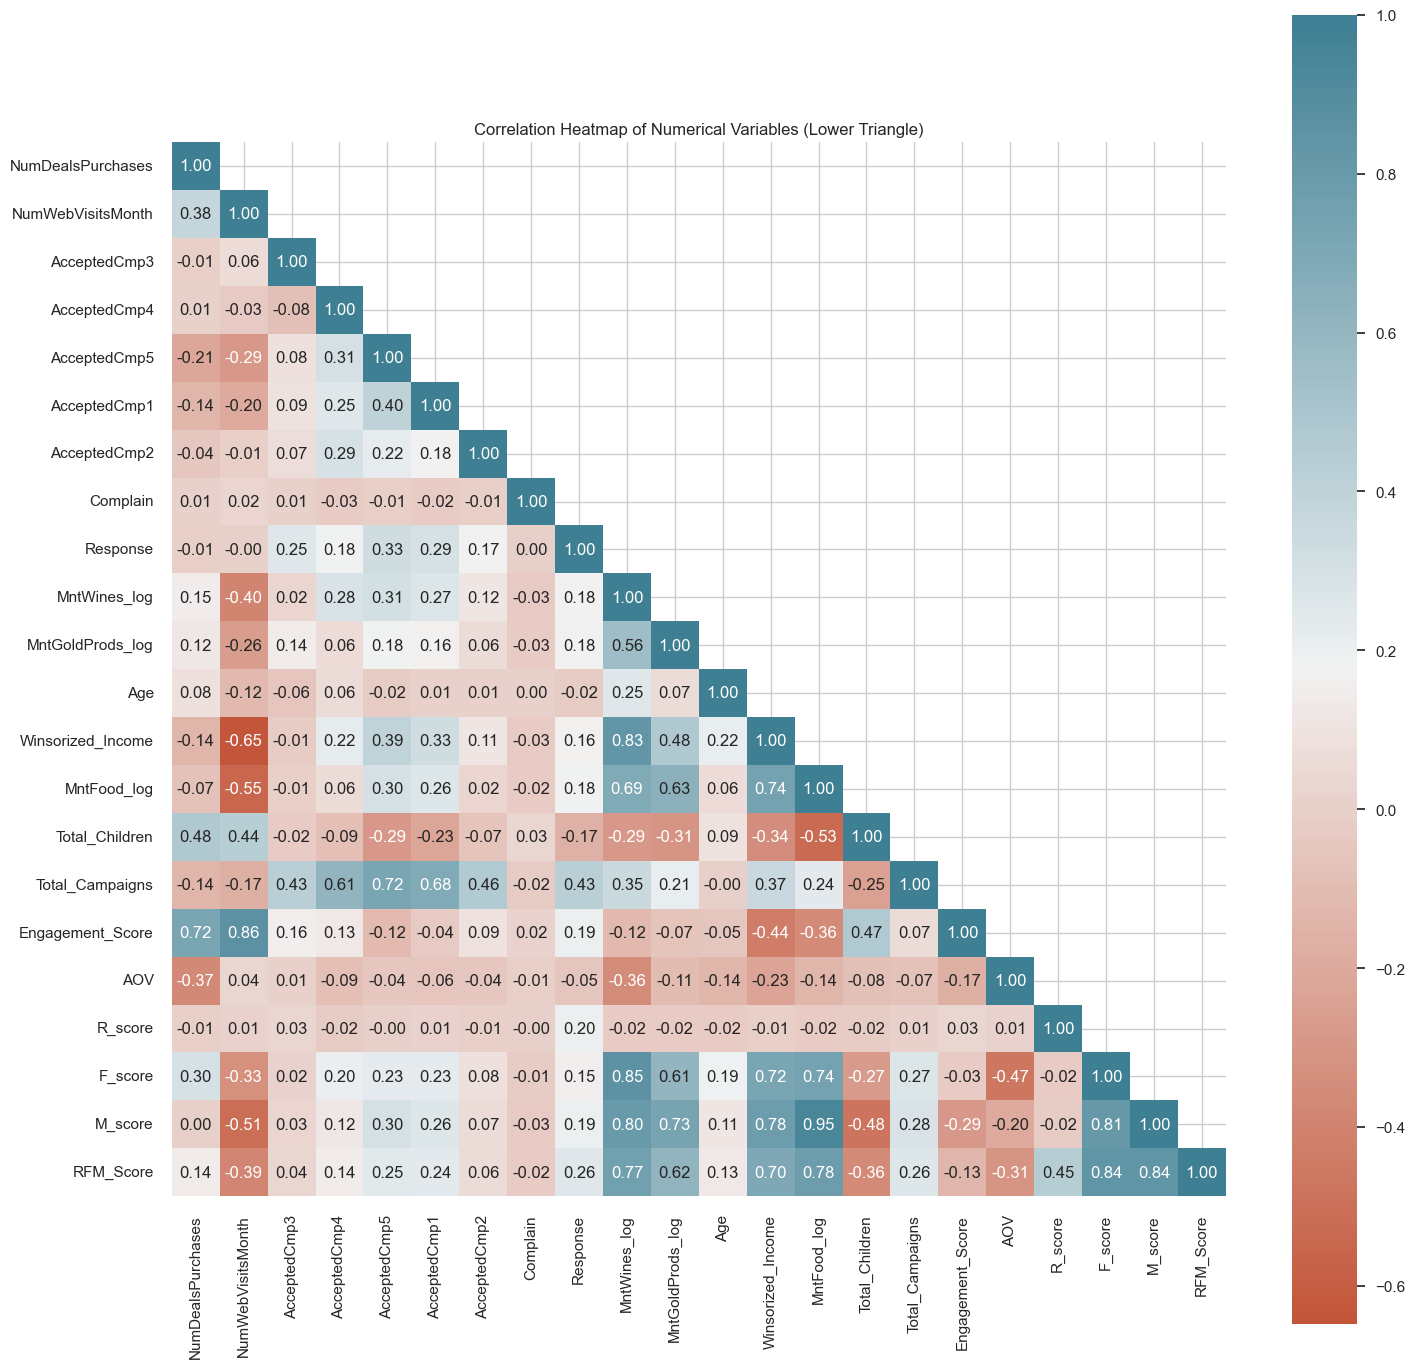

In [101]:
# Select only the numerical columns
numerical_X1 = X.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix_final = numerical_X1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_final, dtype=bool), k=1)

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix_final, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

In [102]:
# Final decision to drop columns with high correlations
X.drop(['NumWebVisitsMonth', 'Winsorized_Income', 'M_score', 'F_score'], axis=1, inplace=True)

# Data Exportation

In [103]:
# Export results
X.to_excel("campaign_prepared.xlsx")